[https://www.reneshbedre.com/blog/anova.html](https://www.reneshbedre.com/blog/anova.html)

In [1]:
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
rcParams['font.size'] = 13
rcParams['figure.dpi'] = 300

fpga1 = 'smarthls'
fpga2 = 'vivado'

import pandas as pd
# load data file
df1 = pd.read_csv('sbesc2022-project-metrics - ' + fpga1 + '.csv')
df2 = pd.read_csv('sbesc2022-project-metrics - ' + fpga2 + '.csv')

# BoxPlots

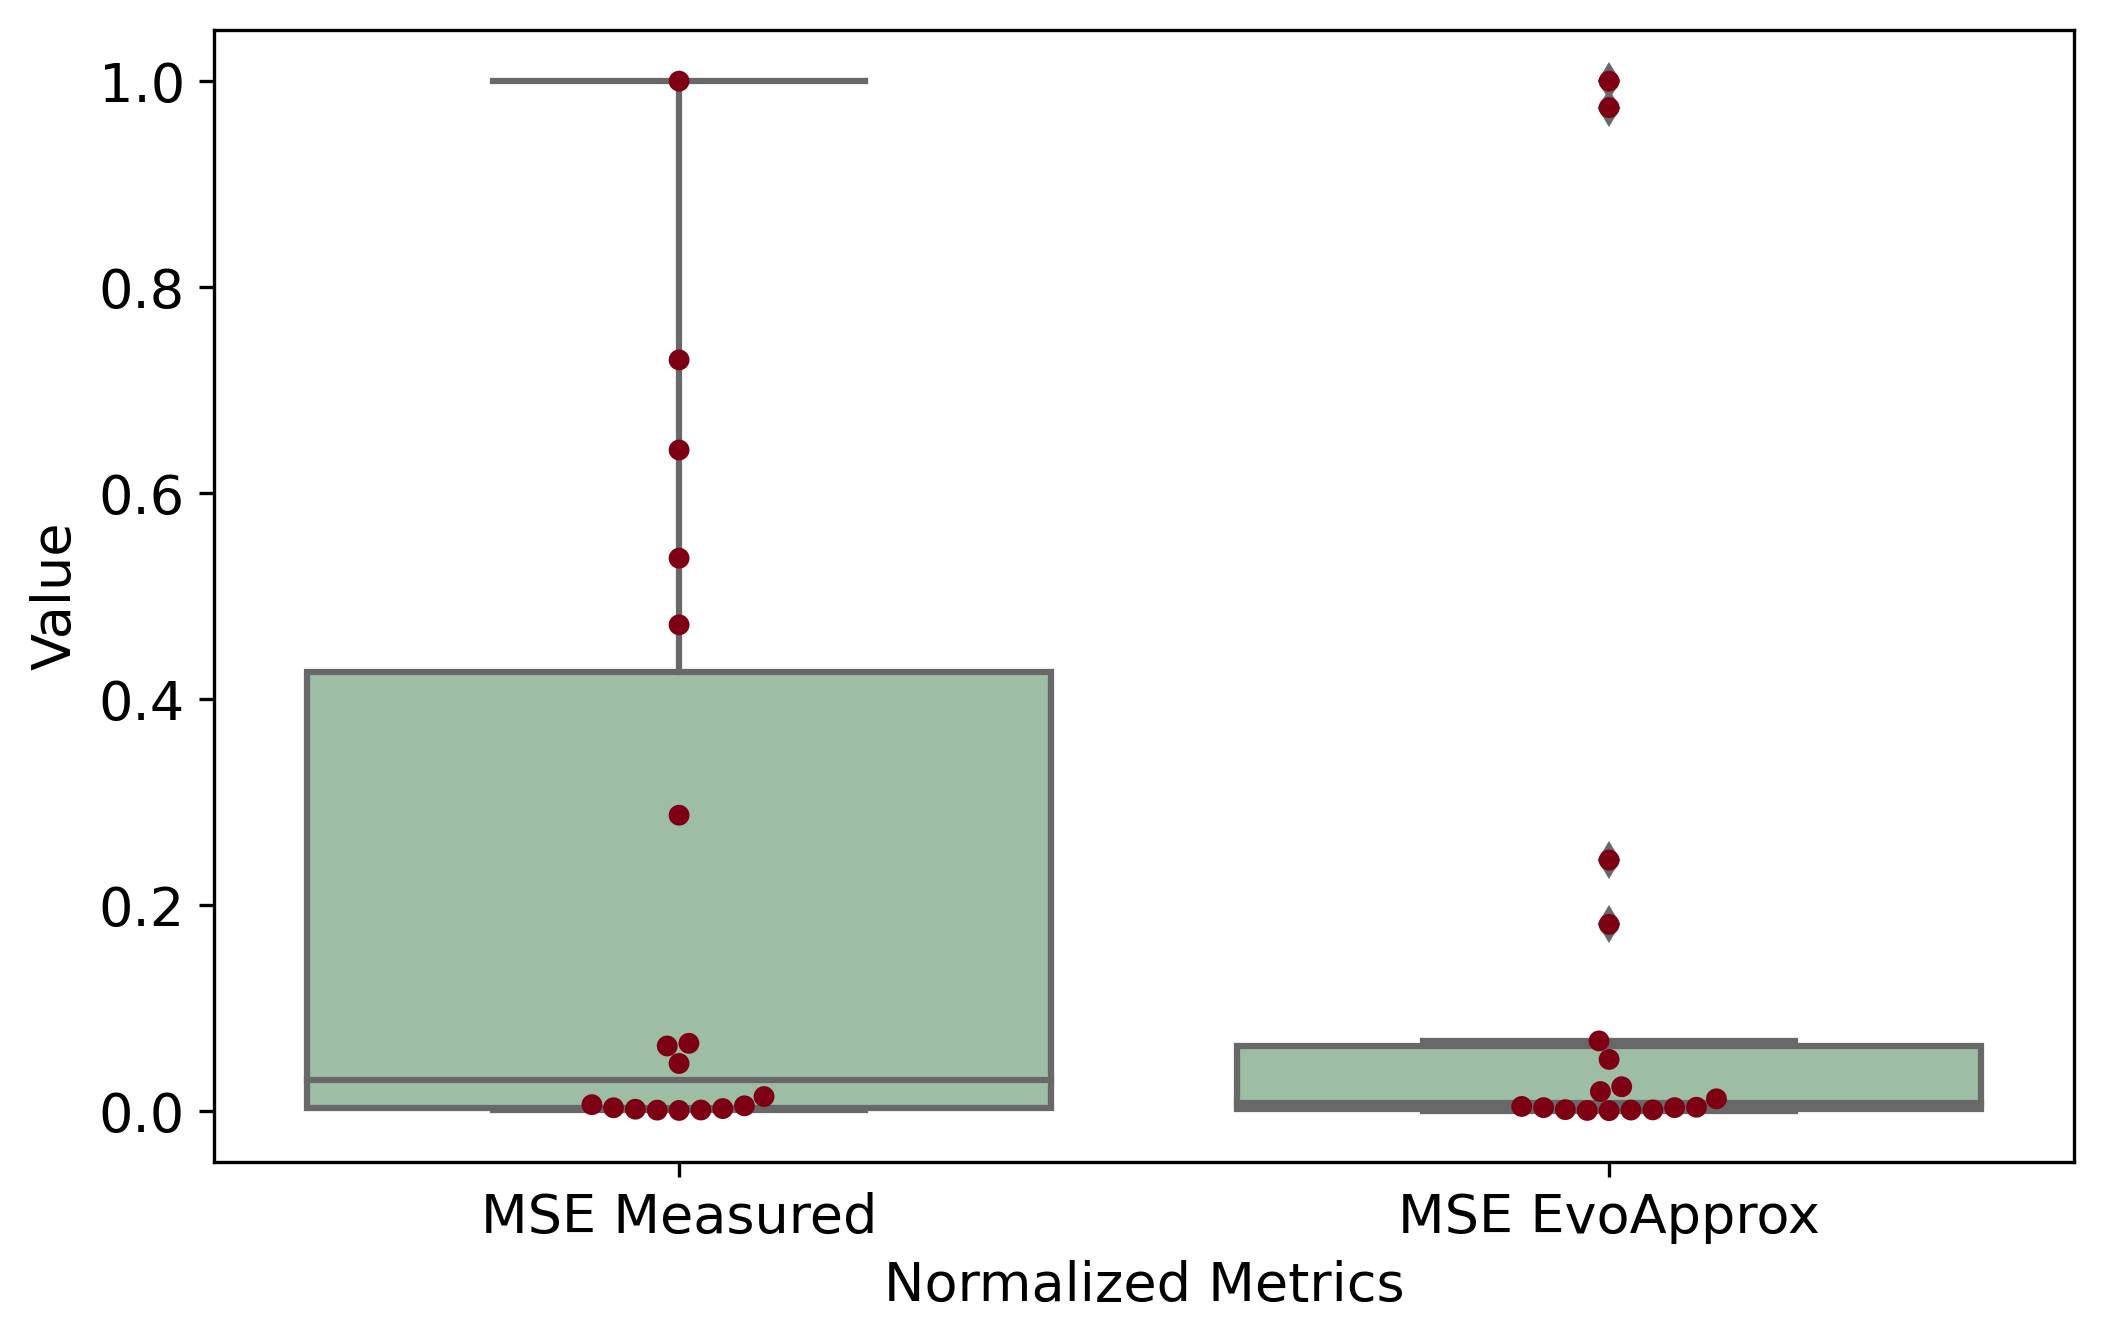

In [2]:
# reshape the d dataframe suitable for statsmodels package 
df1 = df1.rename(columns={'NormMSE': 'MSE Measured', 'NormMSEO': 'MSE EvoApprox'})

df_melt = pd.melt(df1.reset_index(), id_vars=['index'], value_vars=['MSE Measured','MSE EvoApprox'])
# replace column names
df_melt.columns = ['index', 'Normalized Metrics', 'Value']
df1 = df1.rename(columns={'MSE Measured': 'NormMSE', 'MSE EvoApprox': 'NormMSEO'})

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Normalized Metrics', y='Value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="Normalized Metrics", y="Value", data=df_melt, color='#7d0013')
plt.savefig(fpga1 + '/boxplot-MSEvsMSEO.png')
plt.show()
################################################################################

/home/tiago/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


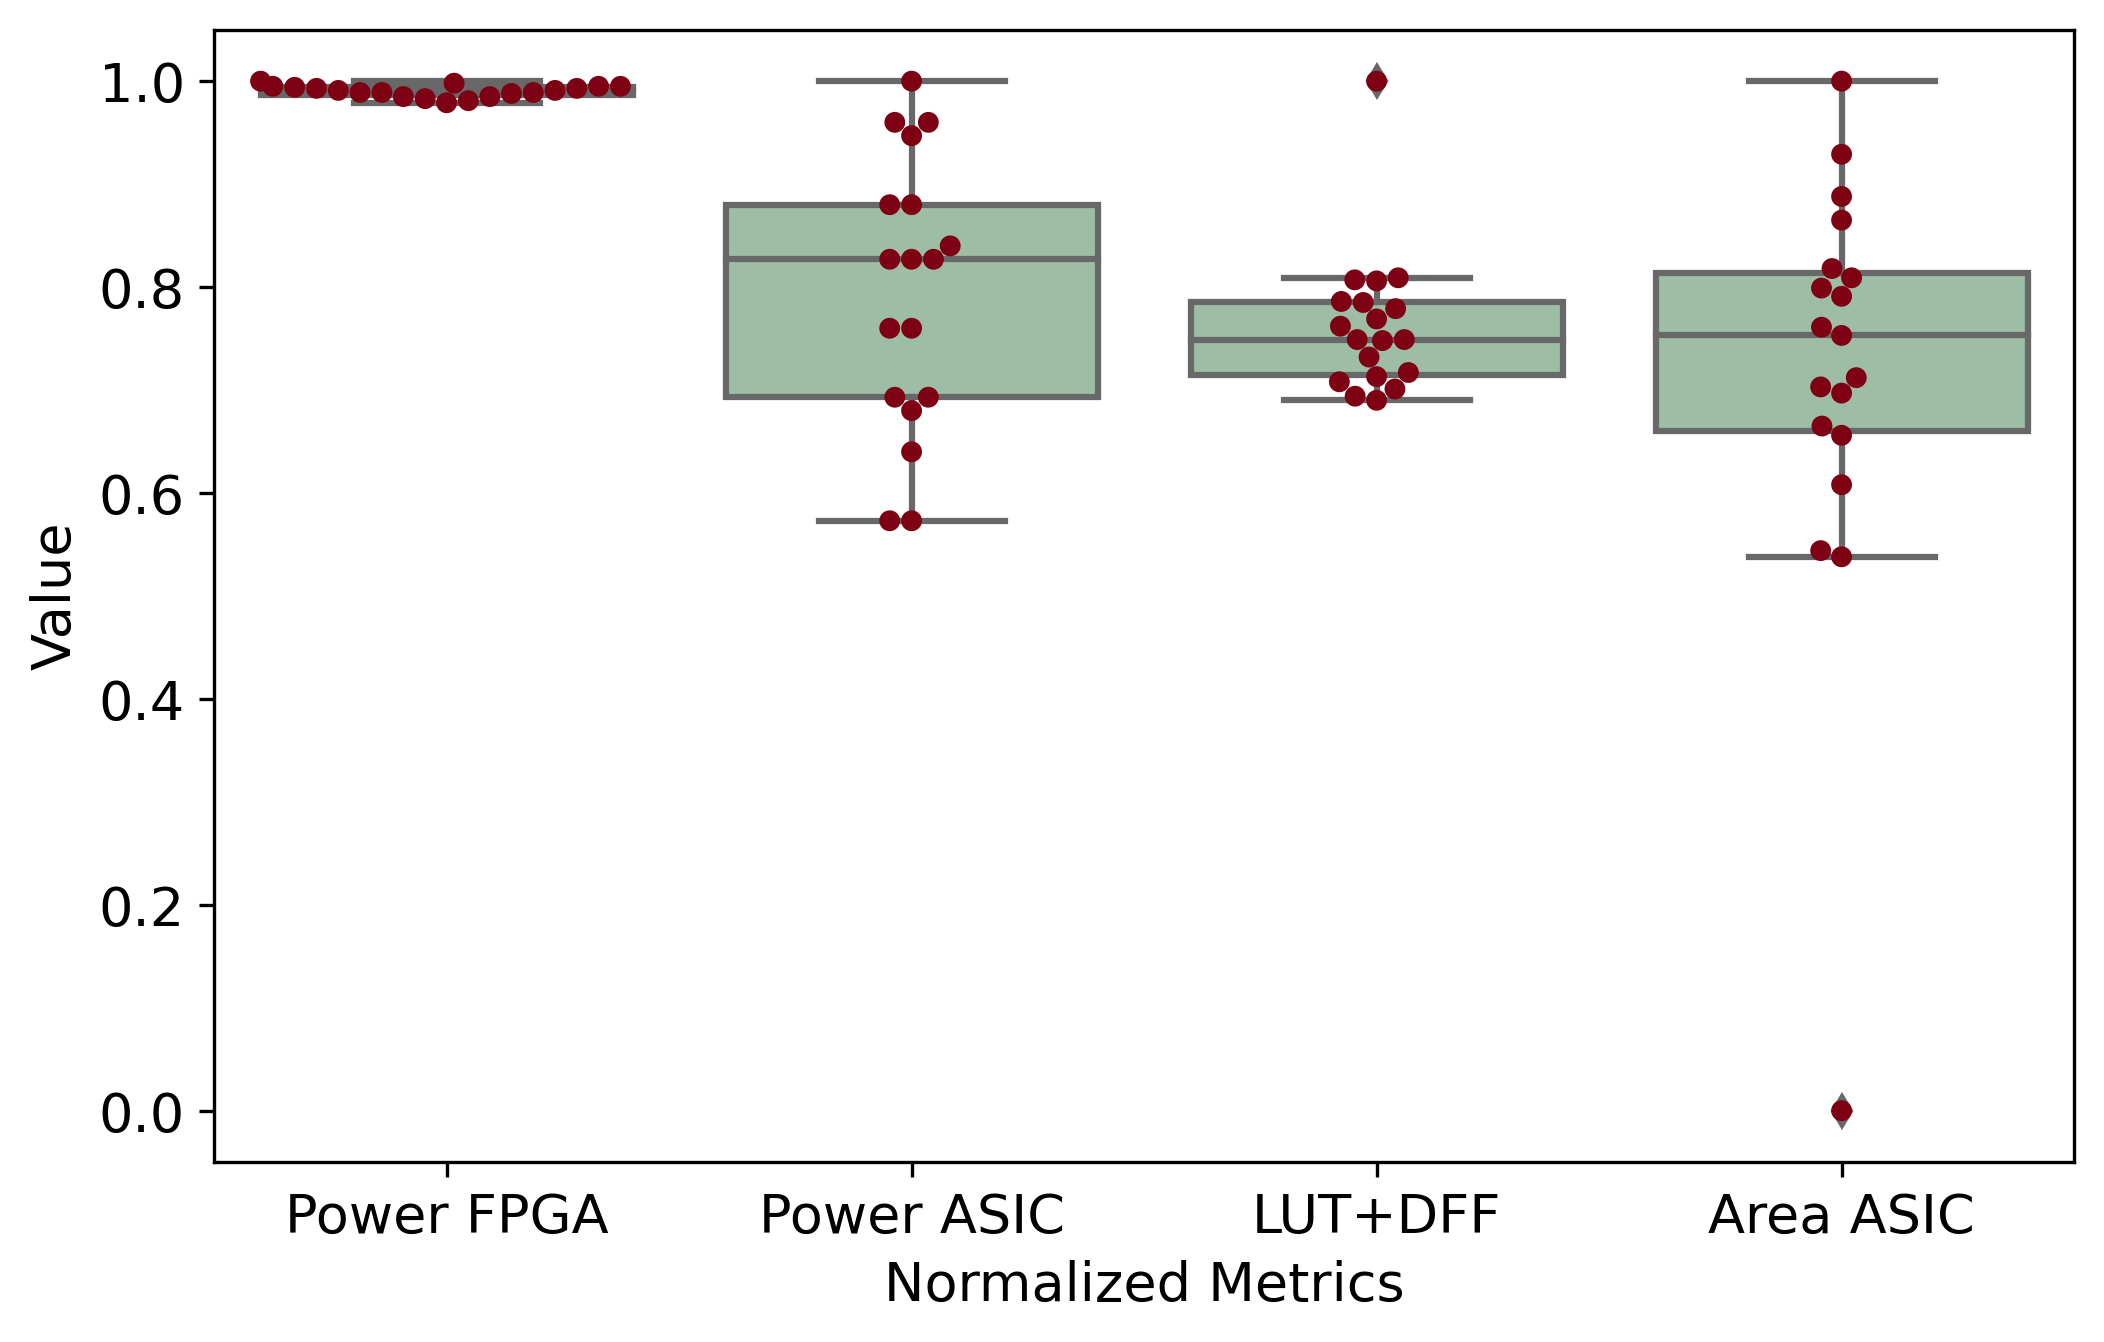

In [3]:
df1 = df1.rename(columns={'NormTPower': 'Power FPGA', 'NormPower': 'Power ASIC', 'NormLUTDFF': 'LUT+DFF', 'NormArea': 'Area ASIC'})

df_melt = pd.melt(df1.reset_index(), id_vars=['index'], value_vars=['Power FPGA','Power ASIC', 'LUT+DFF','Area ASIC'])
# replace column names
df_melt.columns = ['index', 'Normalized Metrics', 'Value']

df1 = df1.rename(columns={'Power FPGA': 'NormTPower', 'Power ASIC': 'NormPower', 'LUT+DFF': 'NormLUTDFF', 'Area ASIC': 'NormArea'})

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Normalized Metrics', y='Value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="Normalized Metrics", y="Value", data=df_melt, color='#7d0013')
plt.savefig(fpga1 + '/boxplot-TotalPowervsPower.png')
plt.show()

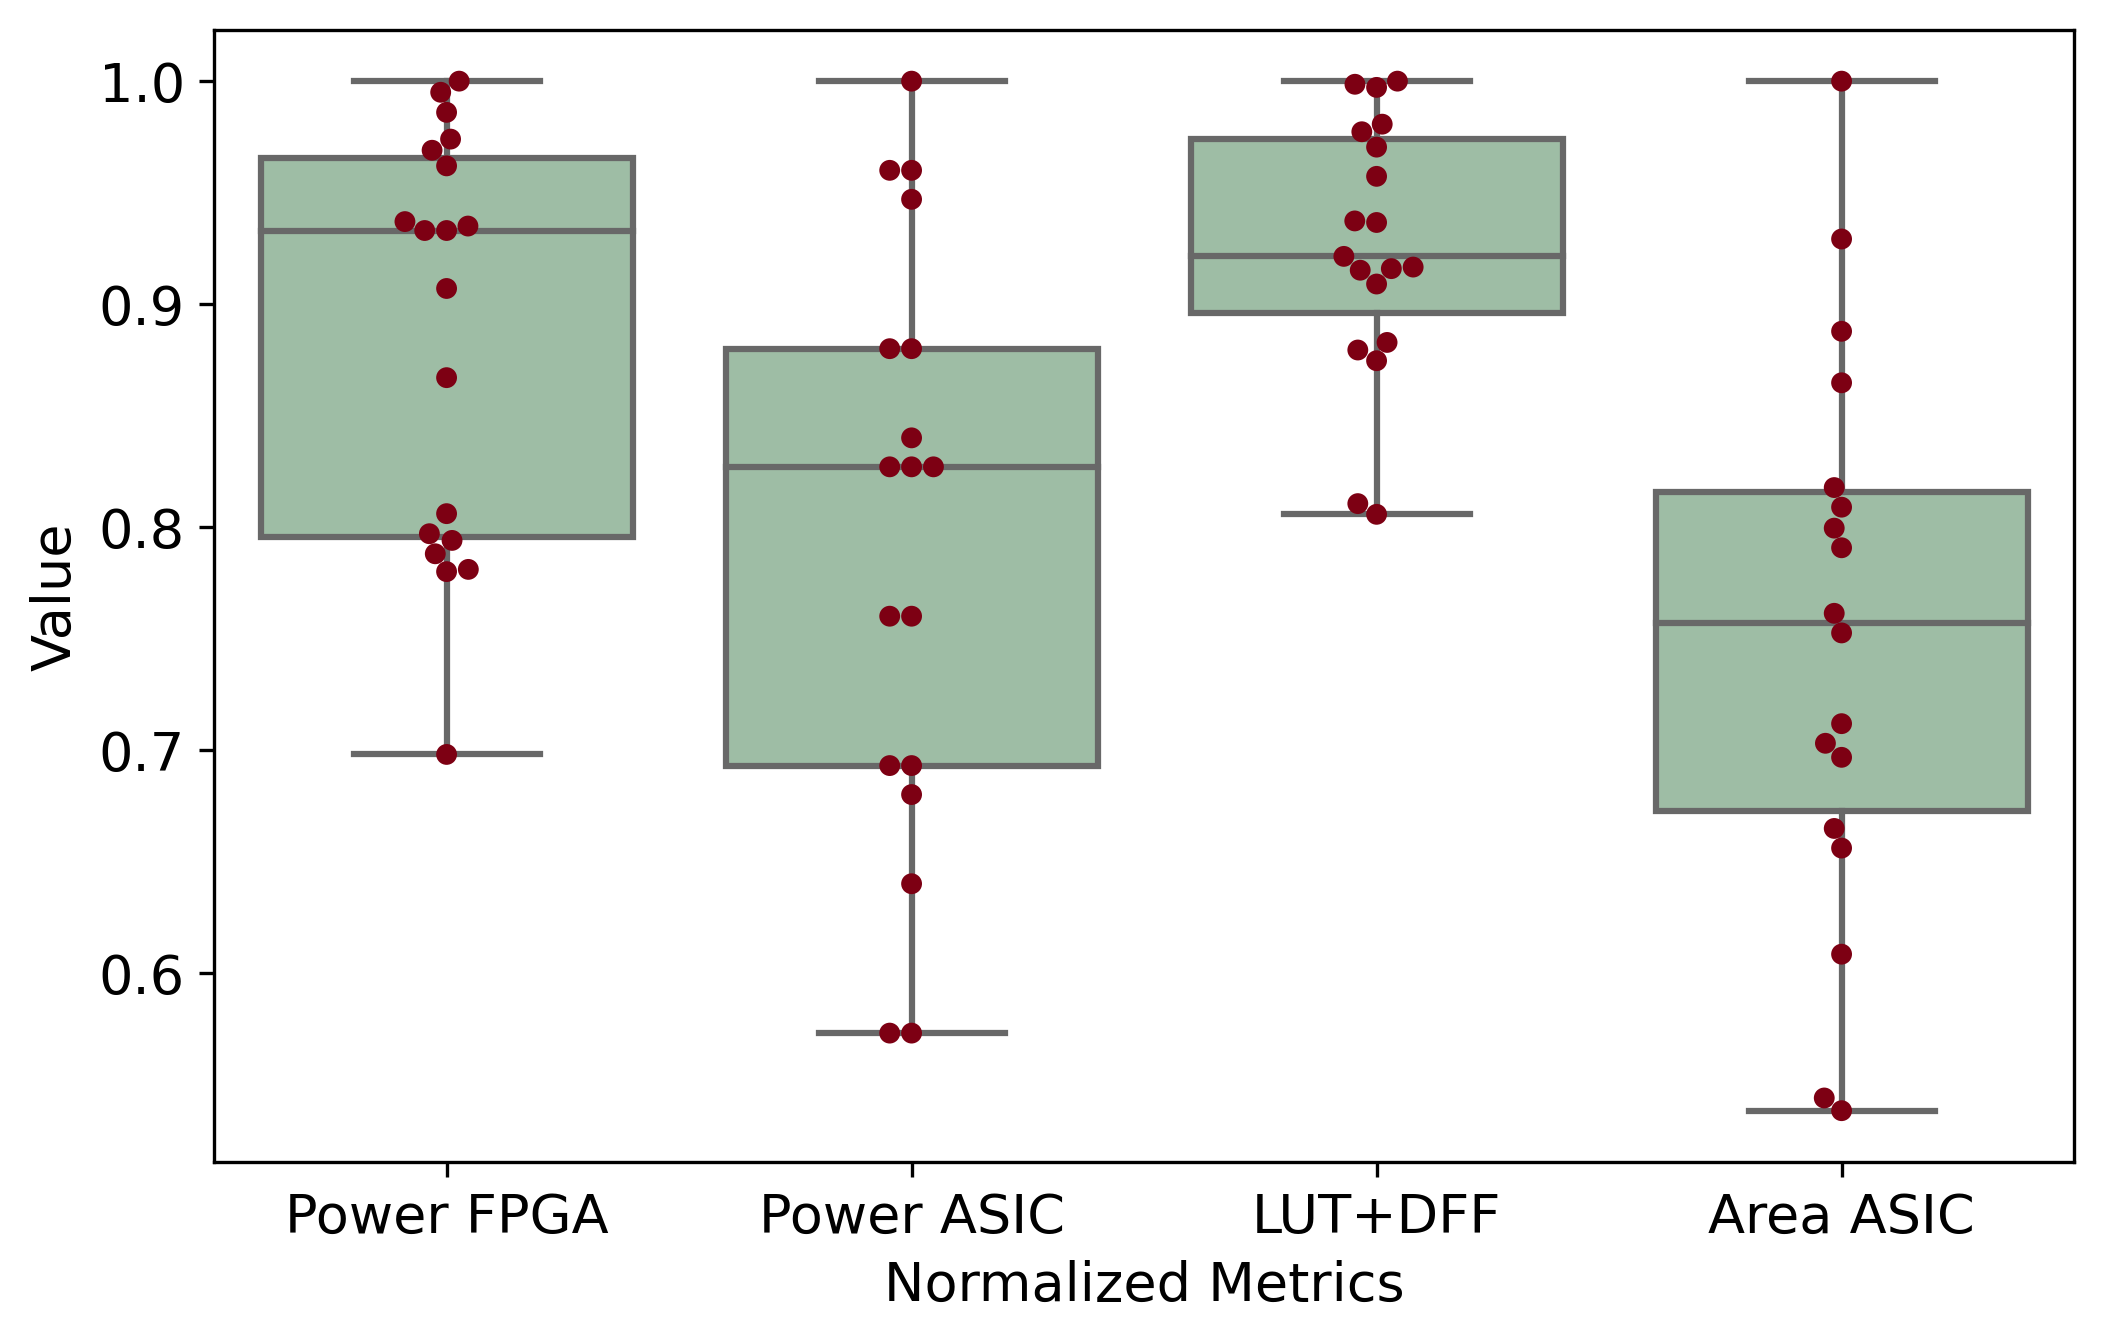

In [4]:
df2 = df2.rename(columns={'NormTPower': 'Power FPGA', 'NormPower': 'Power ASIC', 'NormLUTDFF': 'LUT+DFF', 'NormArea': 'Area ASIC'})

df_melt = pd.melt(df2.reset_index(), id_vars=['index'], value_vars=['Power FPGA','Power ASIC', 'LUT+DFF','Area ASIC'])
# replace column names
df_melt.columns = ['index', 'Normalized Metrics', 'Value']

df2 = df2.rename(columns={'Power FPGA': 'NormTPower', 'Power ASIC': 'NormPower', 'LUT+DFF': 'NormLUTDFF', 'Area ASIC': 'NormArea'})

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Normalized Metrics', y='Value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="Normalized Metrics", y="Value", data=df_melt, color='#7d0013')
plt.savefig(fpga2 + '/boxplot-TotalPowervsPower.png')
plt.show()

In [5]:
df1 = df1.rename(columns={'NormTPower': 'PolarFire Power', 'NormLUTDFF': 'PolarFire LUT+DFF'})
df2 = df2.rename(columns={'NormTPower': 'Arty Power', 'NormLUTDFF': 'Arty LUT+DFF'})
df3 = pd.merge(df1,df2,on='Adder', how='inner')

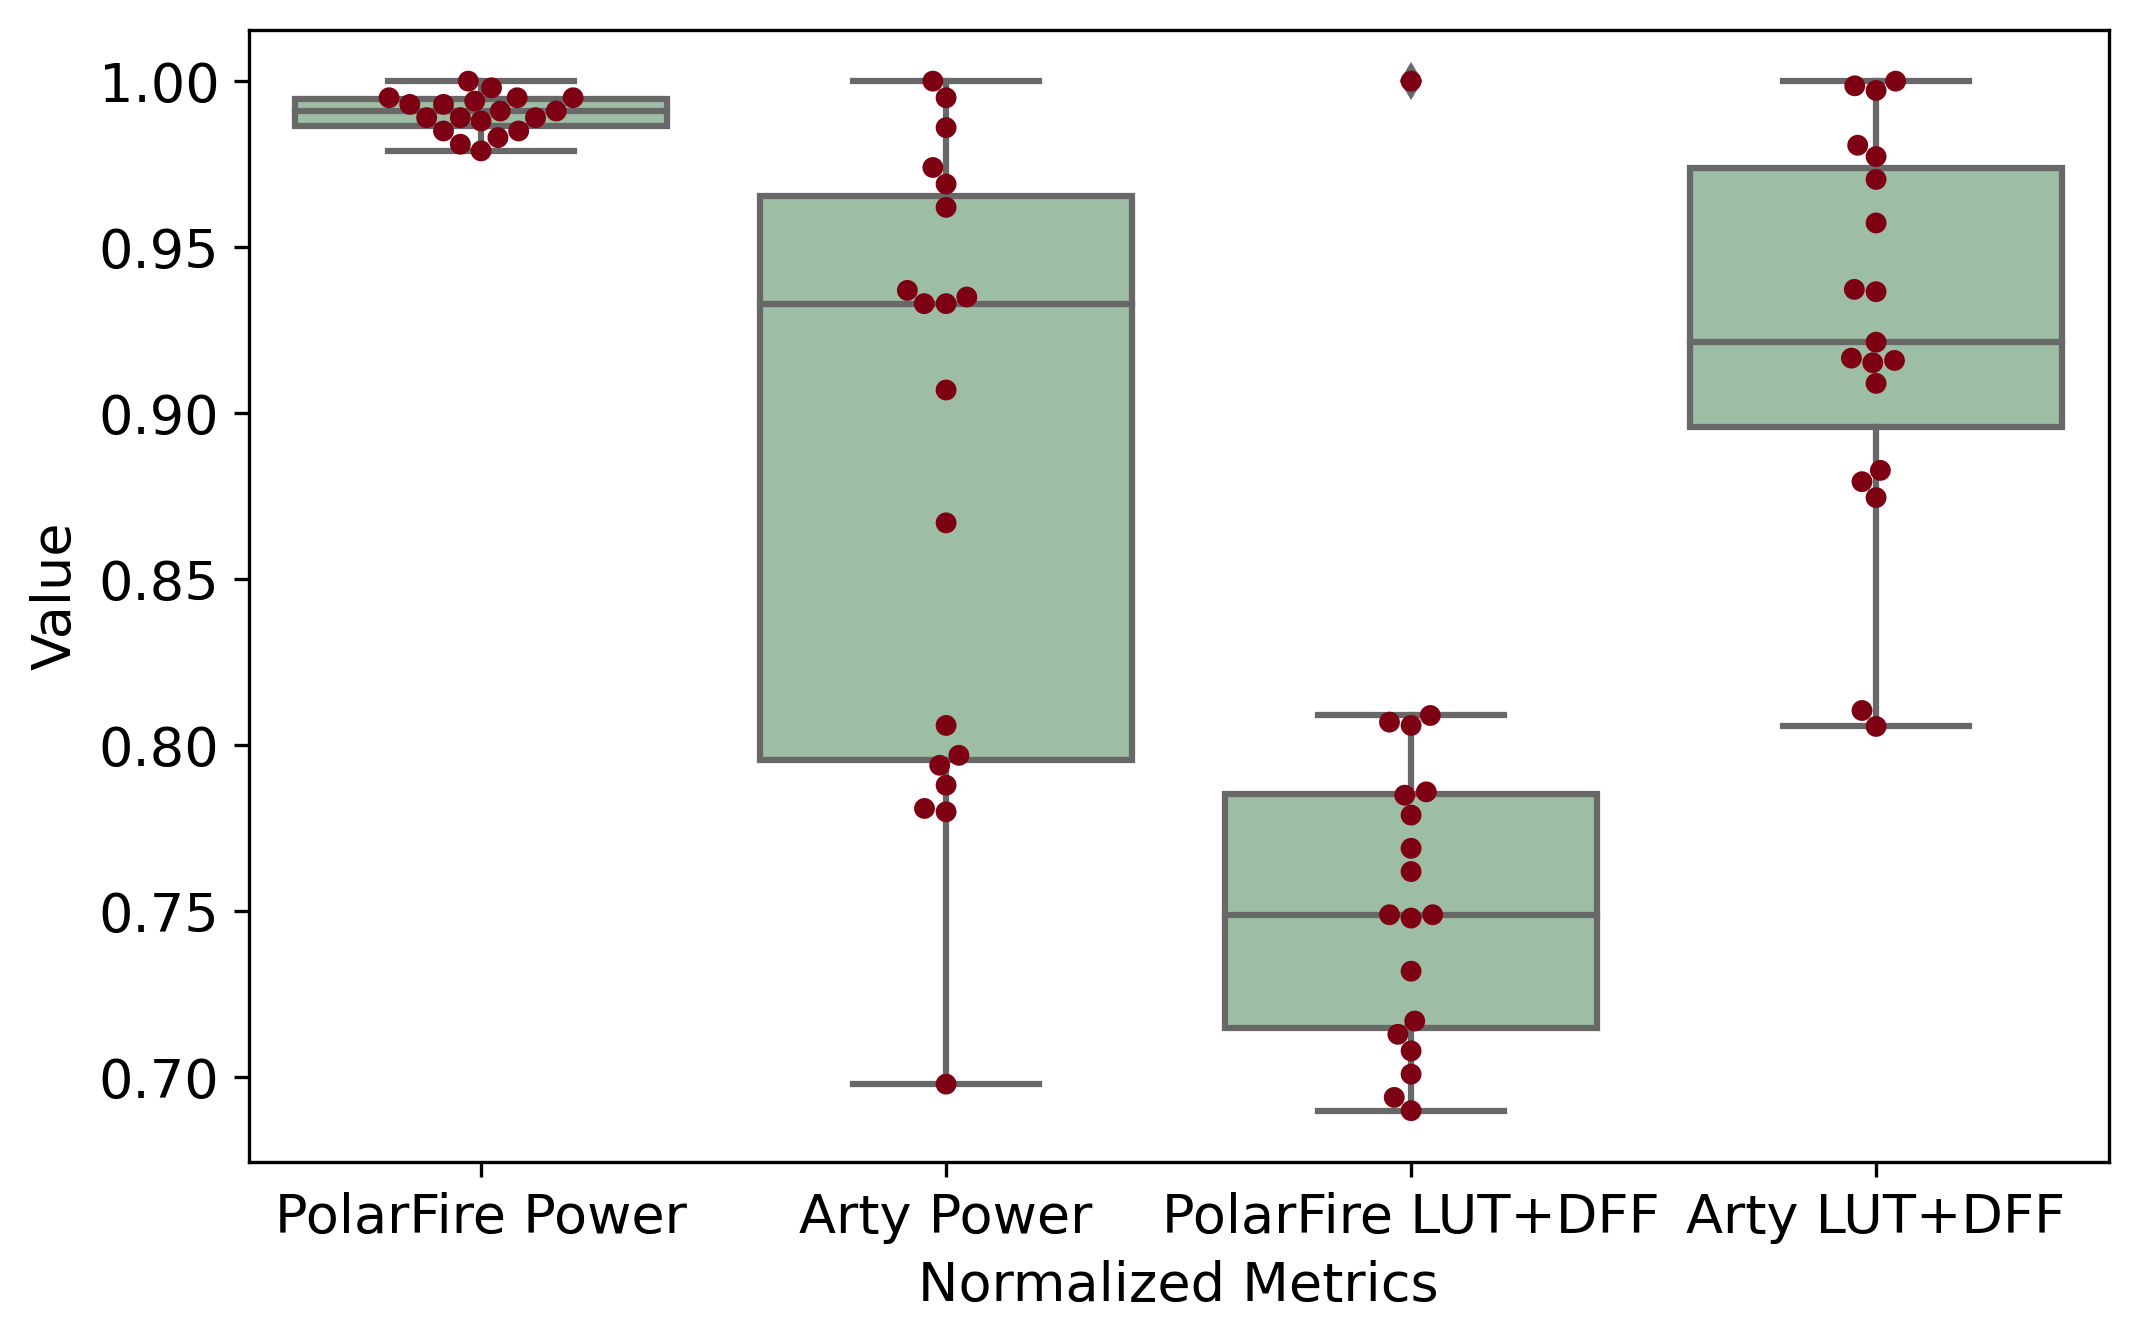

In [6]:
df_melt = pd.melt(df3.reset_index(), id_vars=['index'], value_vars=['PolarFire Power','Arty Power', 'PolarFire LUT+DFF','Arty LUT+DFF'])
# replace column names
df_melt.columns = ['index', 'Normalized Metrics', 'Value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Normalized Metrics', y='Value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="Normalized Metrics", y="Value", data=df_melt, color='#7d0013')
plt.savefig('boxplot-SmartvsXilinx.png')
plt.show()

In [7]:
df1 = df1.rename(columns={'PolarFire Power': 'NormTPower', 'PolarFire LUT+DFF': 'NormLUTDFF'})
df2 = df2.rename(columns={'Arty Power': 'NormTPower', 'Arty LUT+DFF': 'NormLUTDFF'})

# Stat tests

## MSE vs MSE EvoApprox

In [8]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
df1 = df1.rename(columns={'MSEO': 'MSE EvoApprox'})

df_melt = pd.melt(df1.reset_index(), id_vars=['index'], value_vars=['MSE','MSE EvoApprox'])
# replace column names
df_melt.columns = ['index', 'Metrics', 'Value']
fvalue, pvalue = stats.f_oneway(df1['MSE'], df1['MSE EvoApprox'])
#print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Value ~ C(Metrics)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='Value', anova_model='Value ~ C(Metrics)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Metrics),1.0,7.276184e+07,7.276184e+07,7.241046,0.01097
Residual,34.0,3.416499e+08,1.004853e+07,NaN,NaN


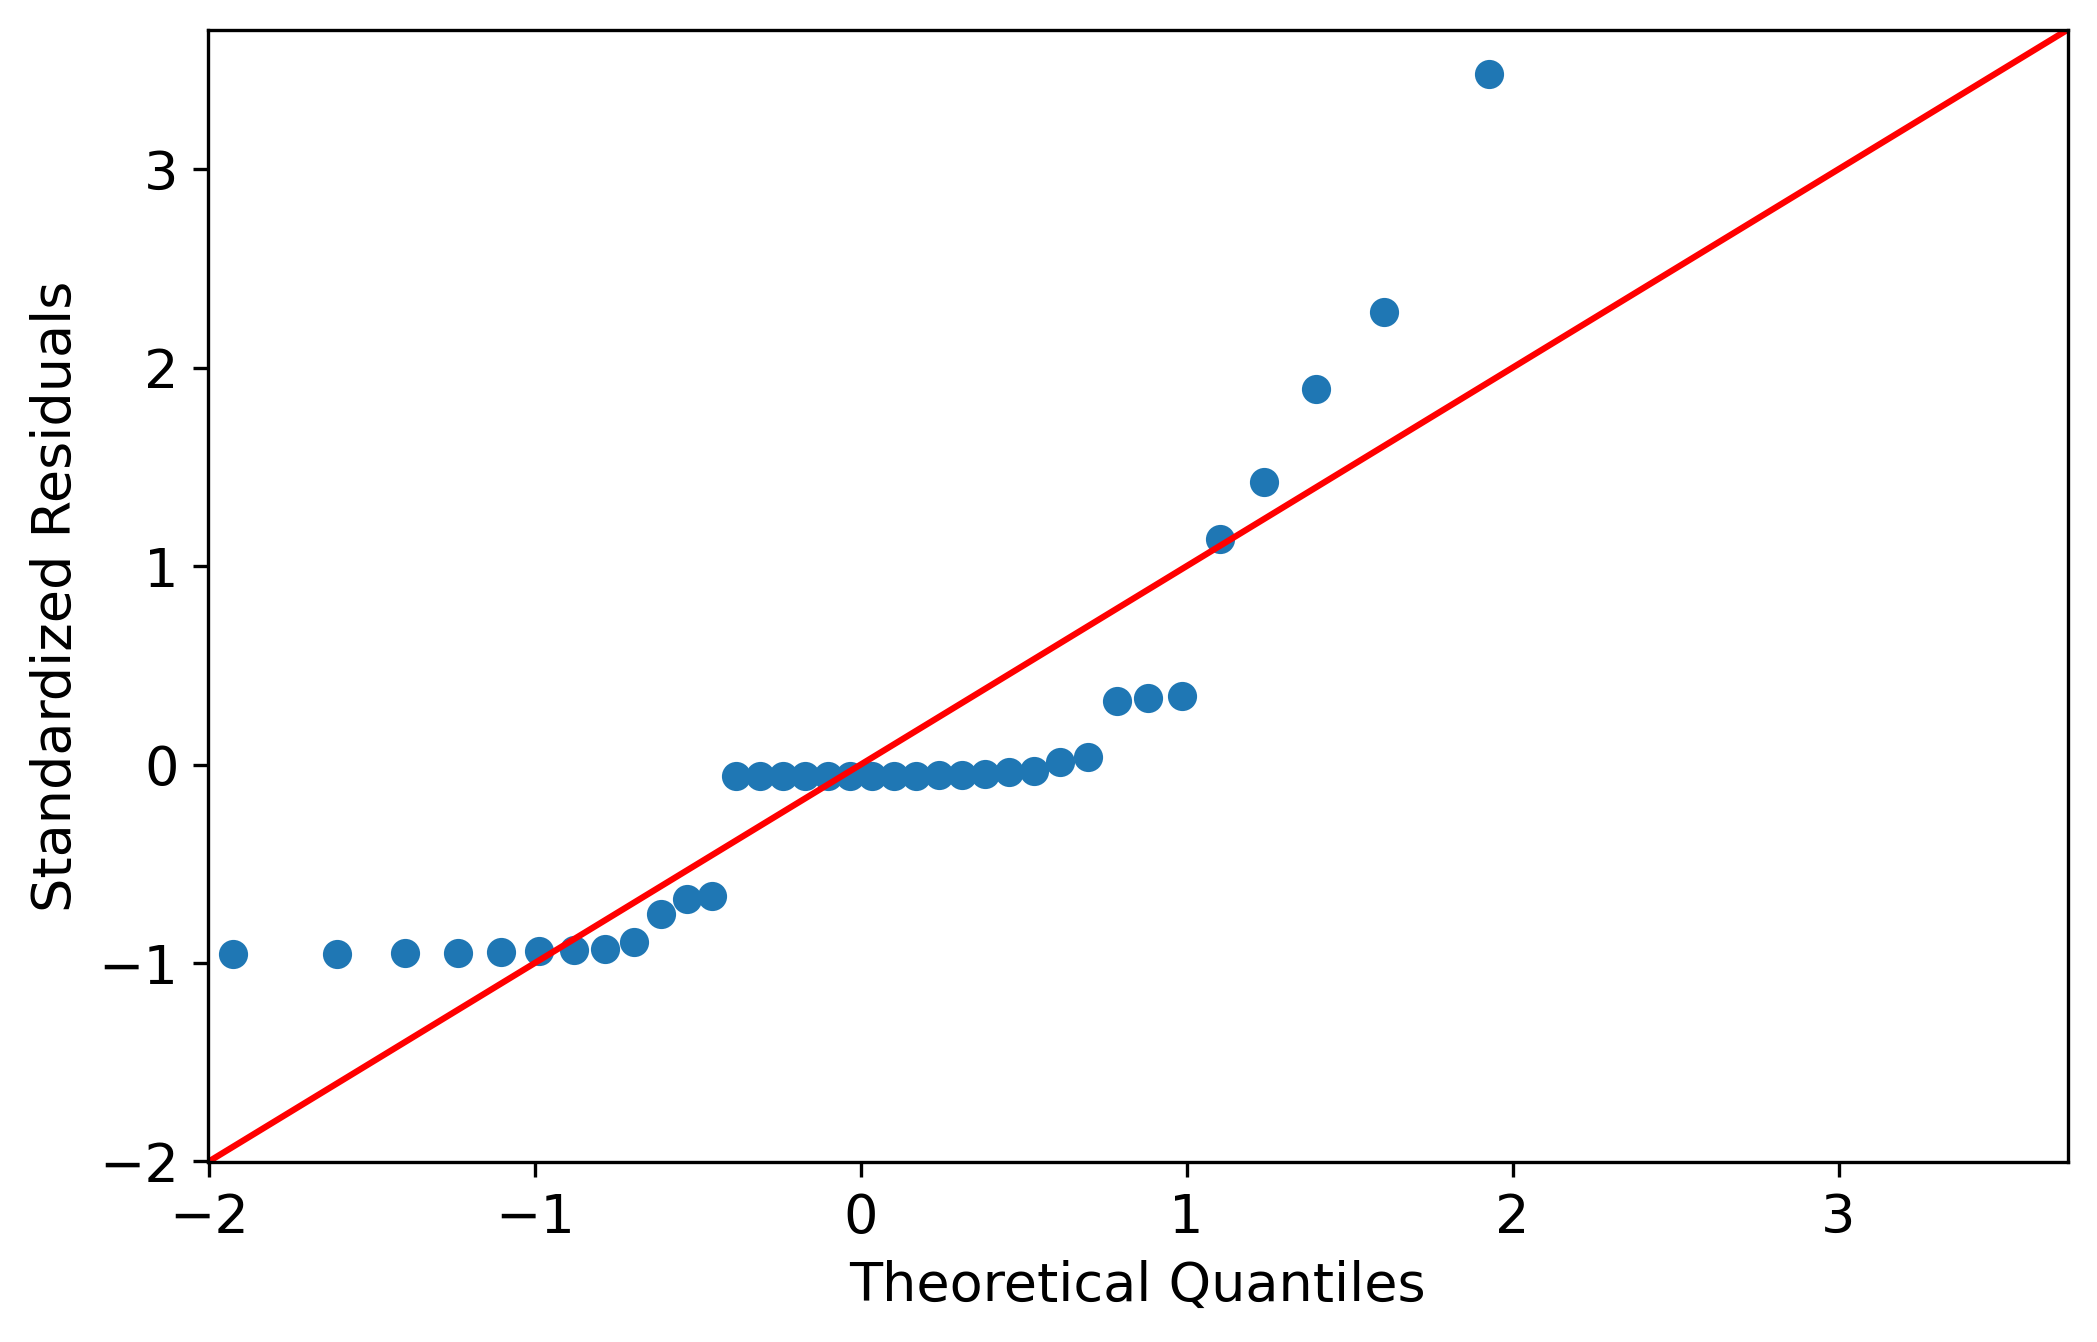

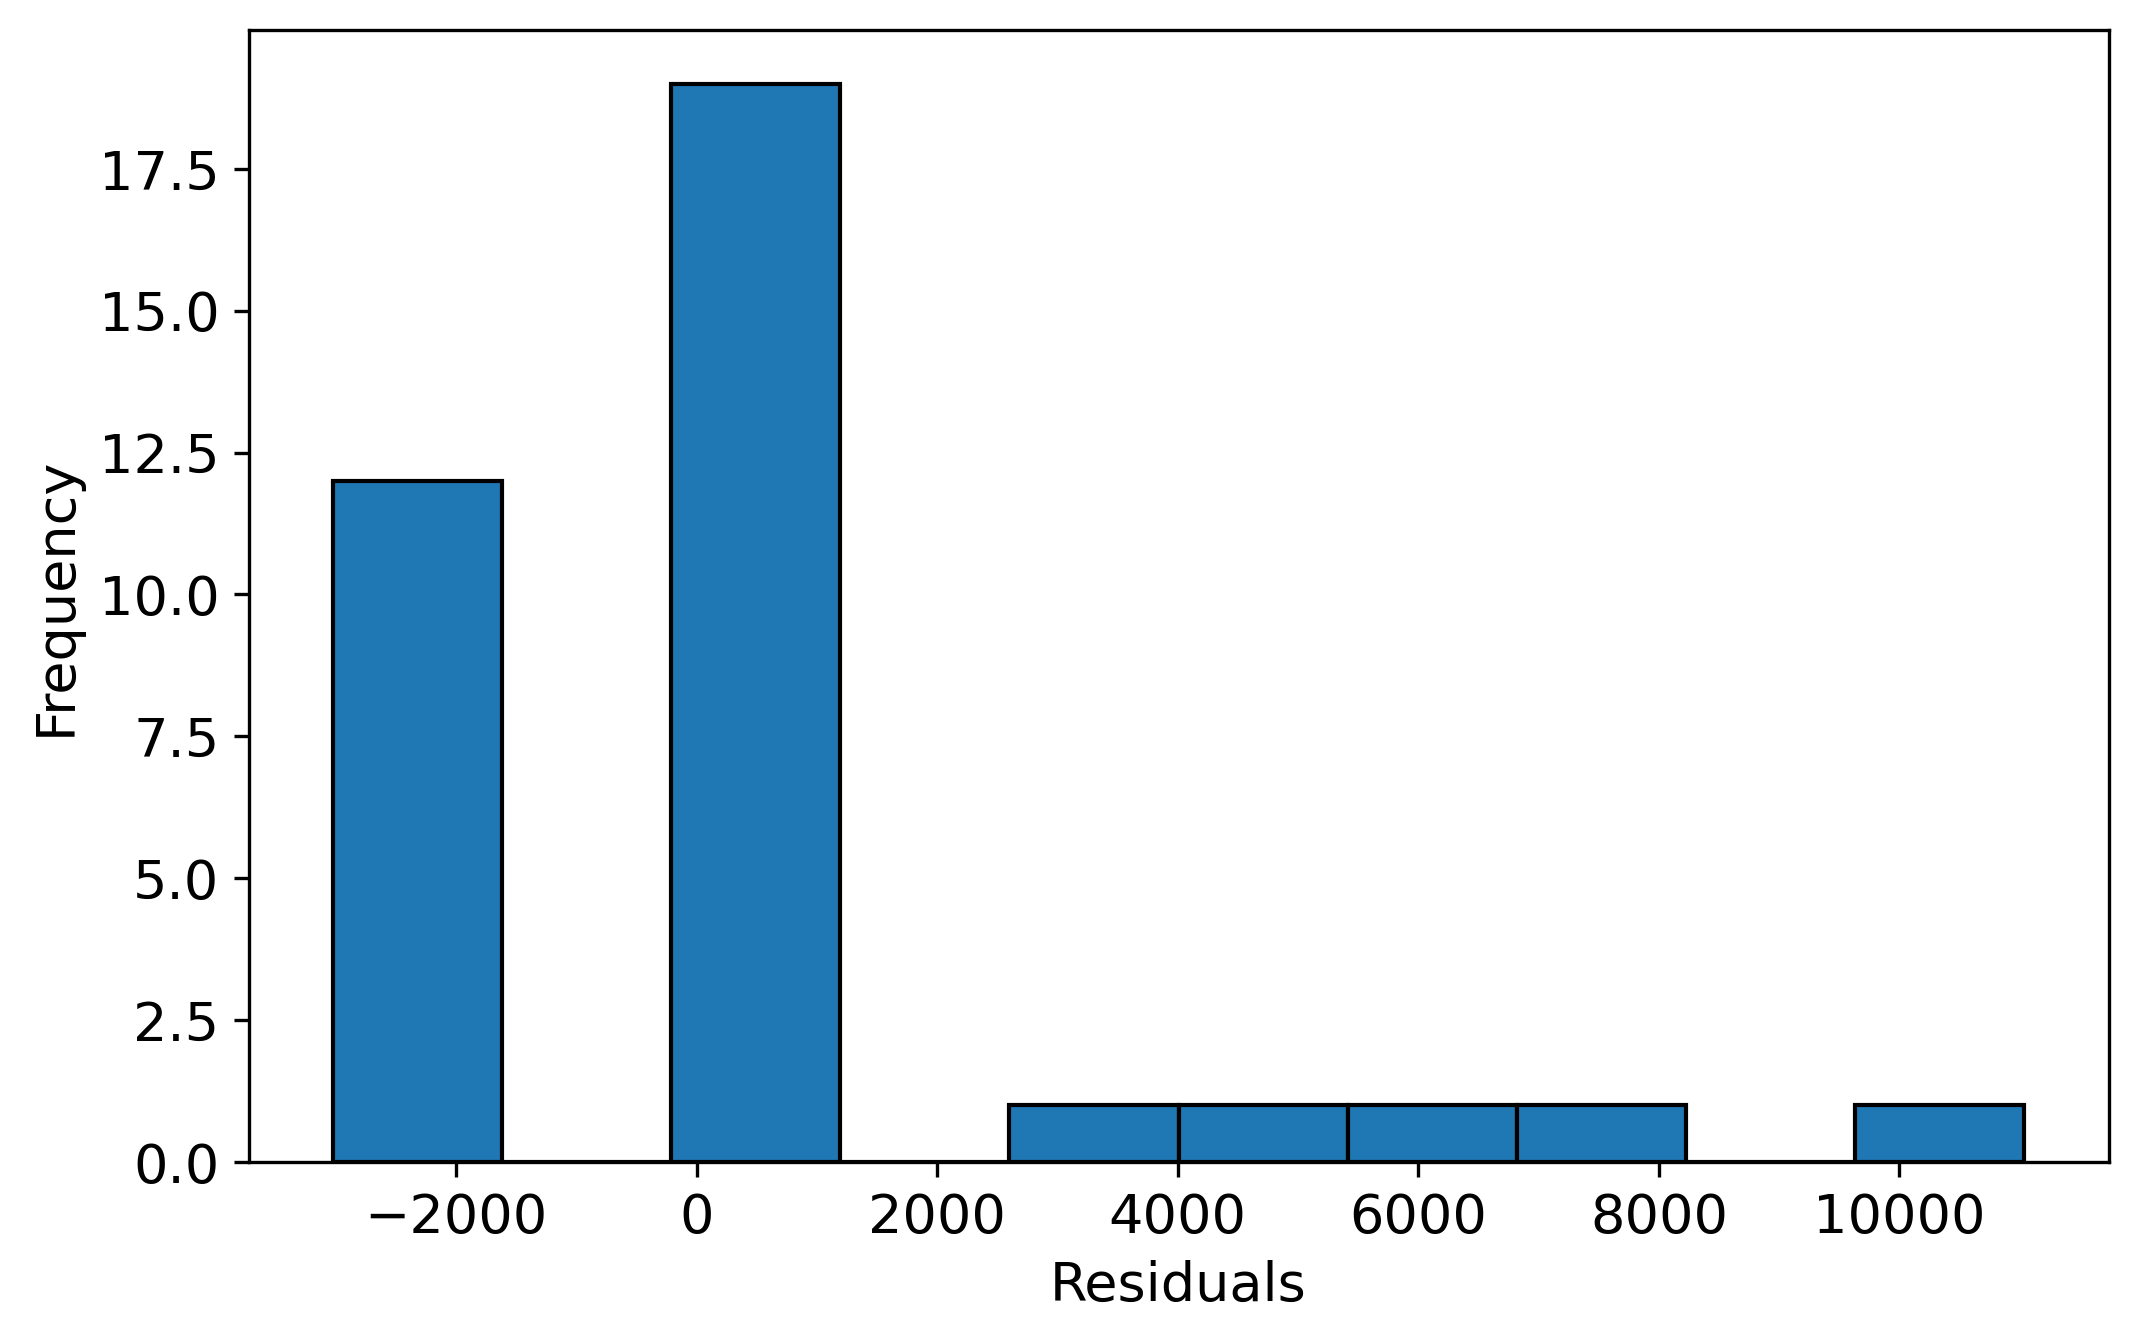

In [9]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig(fpga1 + '/Quantiles-MSEvsMSEO.png')
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.savefig(fpga1 + '/Frequency-MSEvsMSEO.png')
plt.show()

In [10]:
df1 = df1.rename(columns={'MSE EvoApprox': 'MSEO'})

## TotalPower vs Power PolarFire

In [11]:
import scipy.stats as stats
df1 = df1.rename(columns={'TotalPower': 'FPGA Power', 'Power': 'ASIC Power'})


df_melt = pd.melt(df1.reset_index(), id_vars=['index'], value_vars=['FPGA Power','ASIC Power'])
# replace column names
df_melt.columns = ['index', 'Metrics', 'Value']
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df1['FPGA Power'], df1['ASIC Power'])
#print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Value ~ C(Metrics)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='Value', anova_model='Value ~ C(Metrics)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Metrics),1.0,42840.079690,42840.079690,541309.552876,6.489592e-75
Residual,35.0,2.769954,0.079142,NaN,NaN


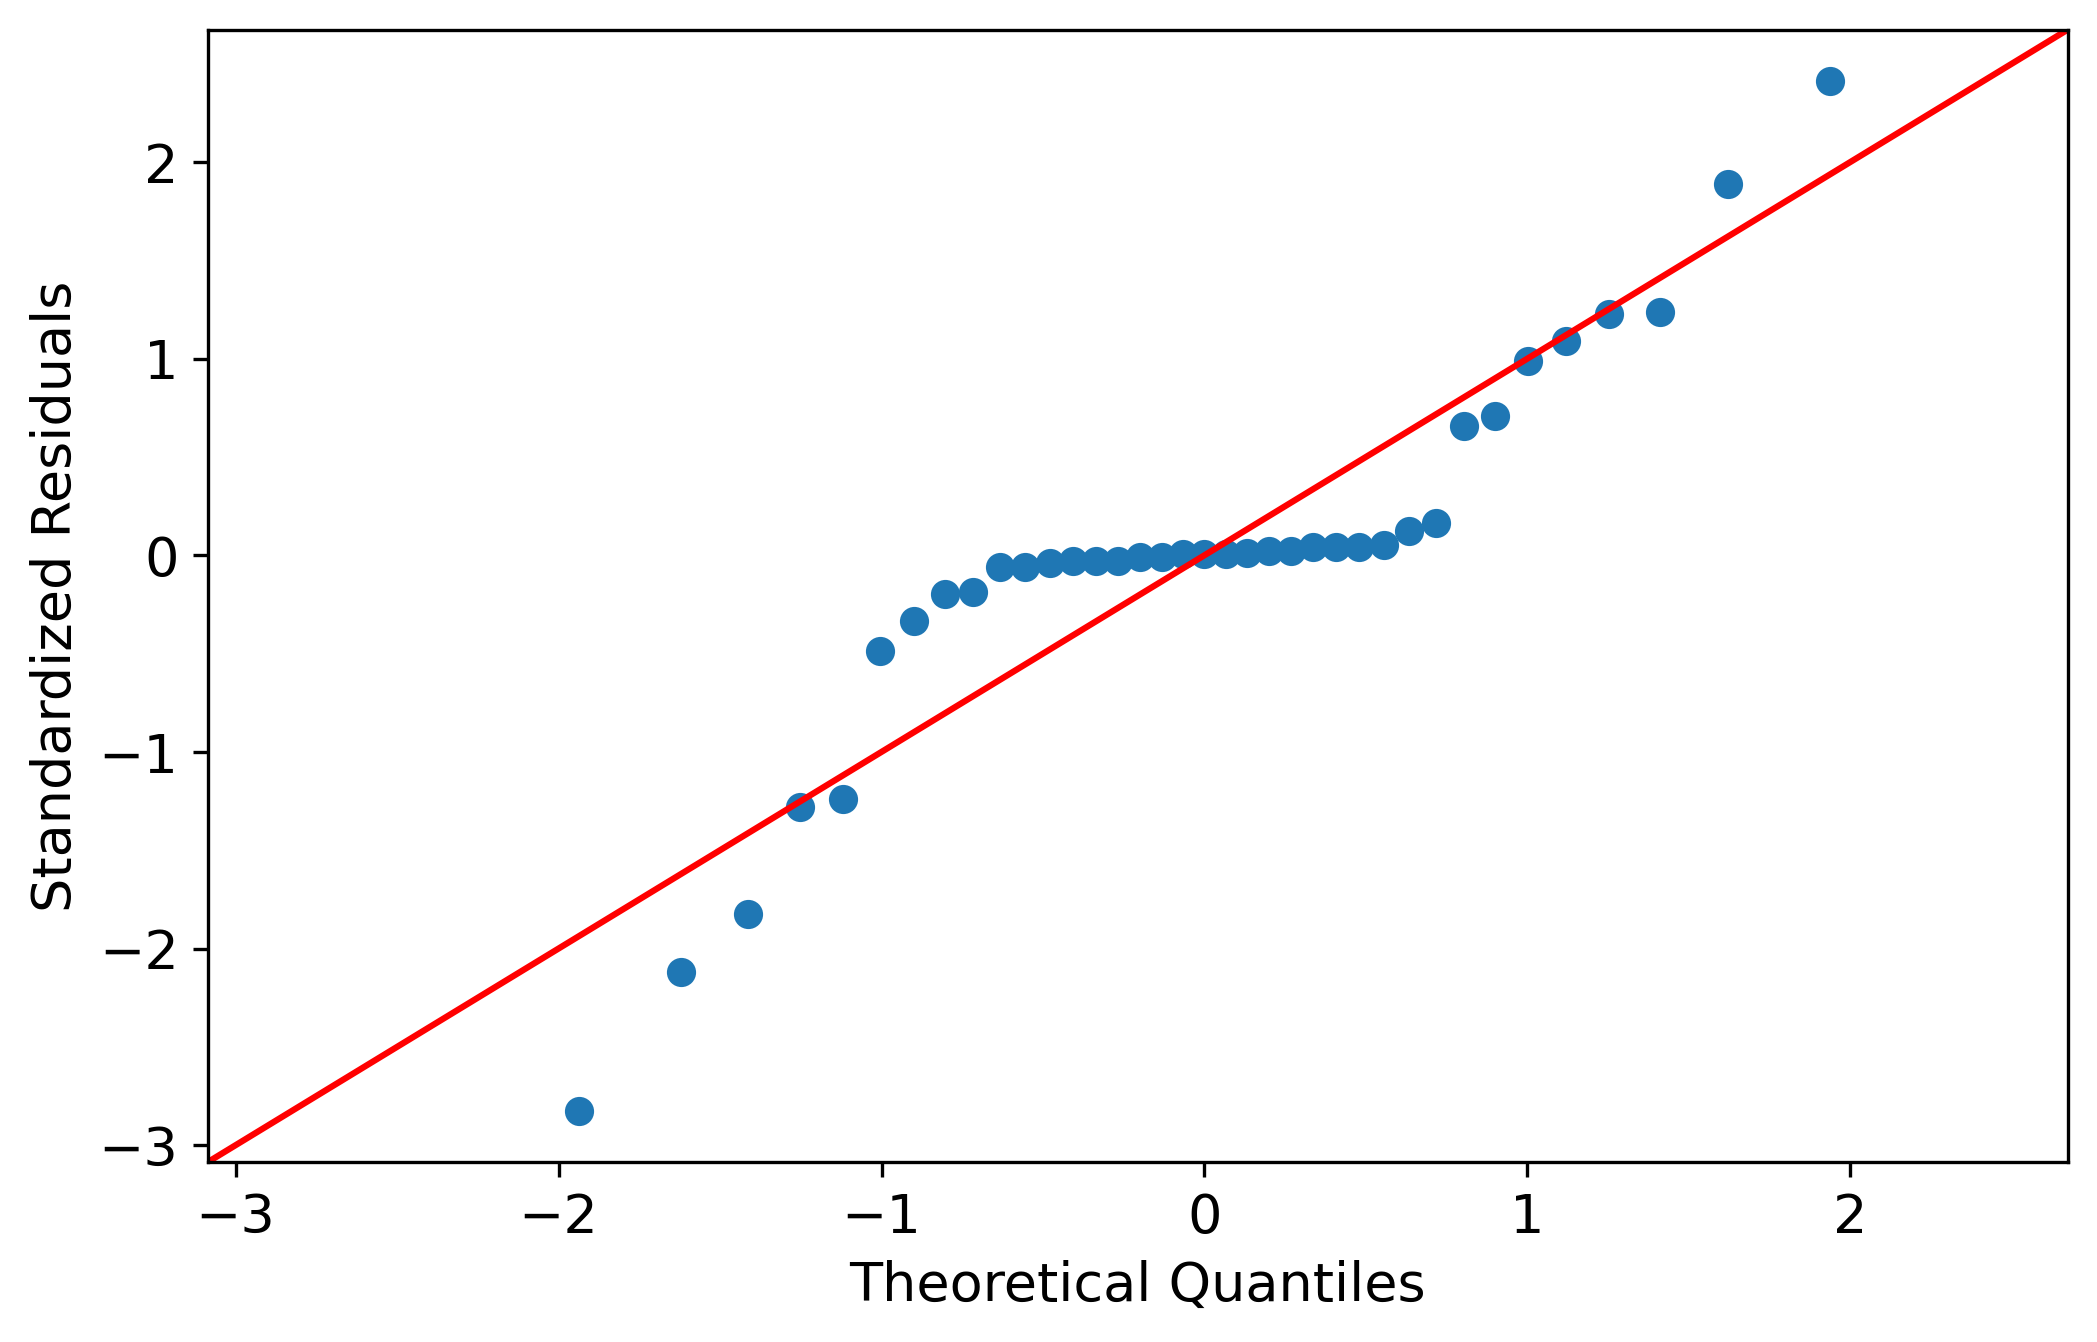

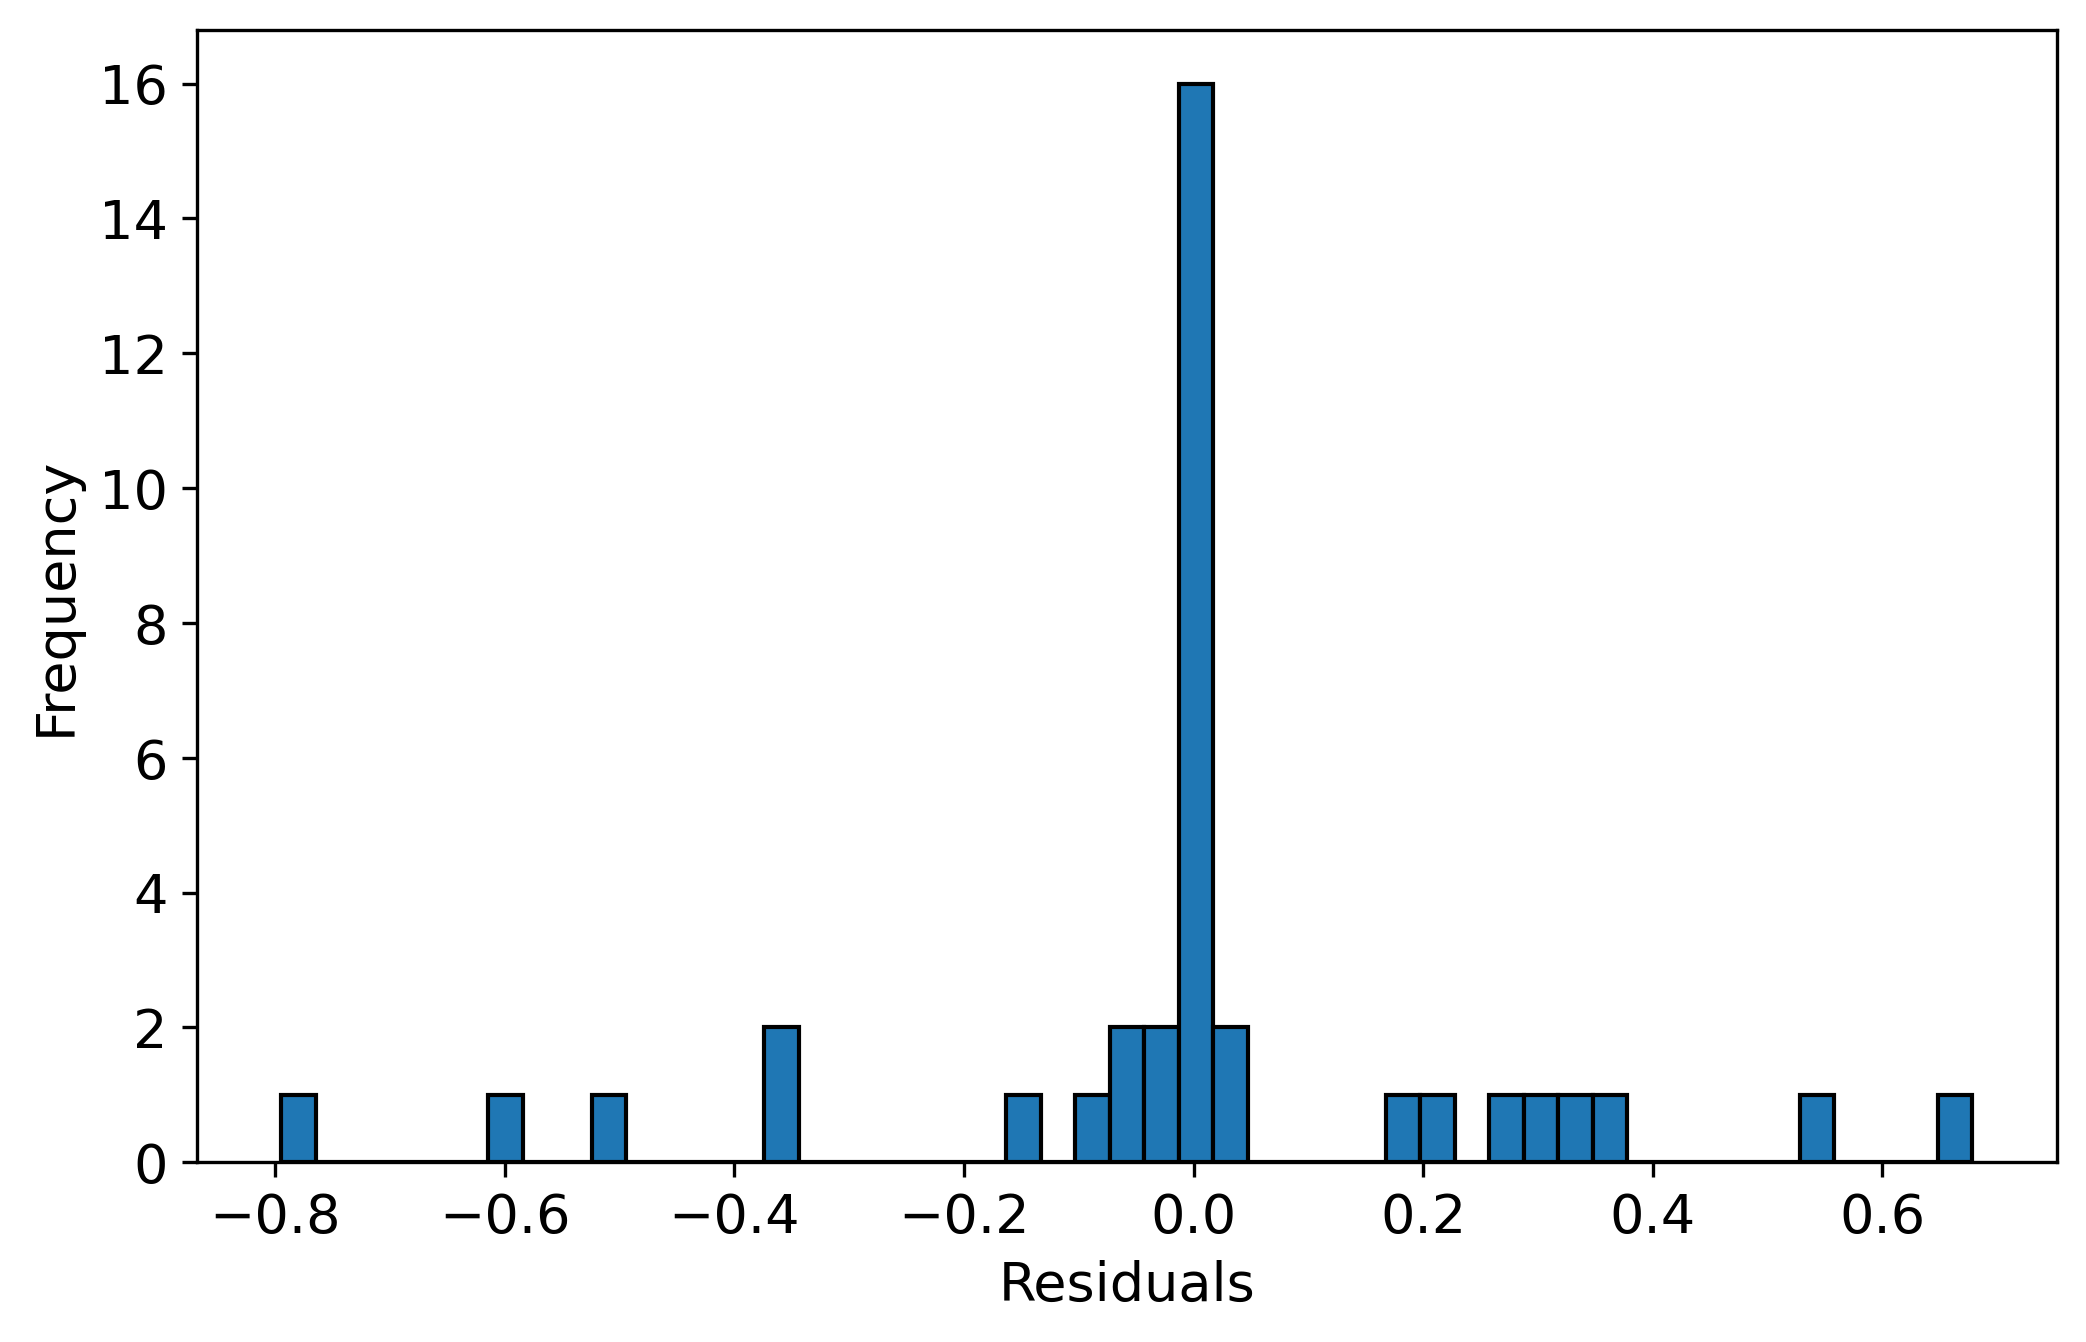

In [12]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig(fpga1 + '/Quantiles-TotalPowervsPower.png')
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.savefig(fpga1 + '/Frequency-TotalPowervsPower.png')
plt.show()

In [13]:
df1 = df1.rename(columns={'FPGA Power': 'TotalPower', 'ASIC Power': 'Power'})

## LUT+DFF vs Area PolarFire

In [14]:
import scipy.stats as stats
df1 = df1.rename(columns={'LUTDFF': 'LUT+DFF'})

df_melt = pd.melt(df1.reset_index(), id_vars=['index'], value_vars=['LUT+DFF','Area'])
# replace column names
df_melt.columns = ['index', 'Metrics', 'Value']
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df1['LUT+DFF'], df1['Area'])
#print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Value ~ C(Metrics)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='Value', anova_model='Value ~ C(Metrics)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Metrics),1.0,2.568885e+07,2.568885e+07,1866.987076,5.830102e-32
Residual,35.0,4.815832e+05,1.375952e+04,NaN,NaN


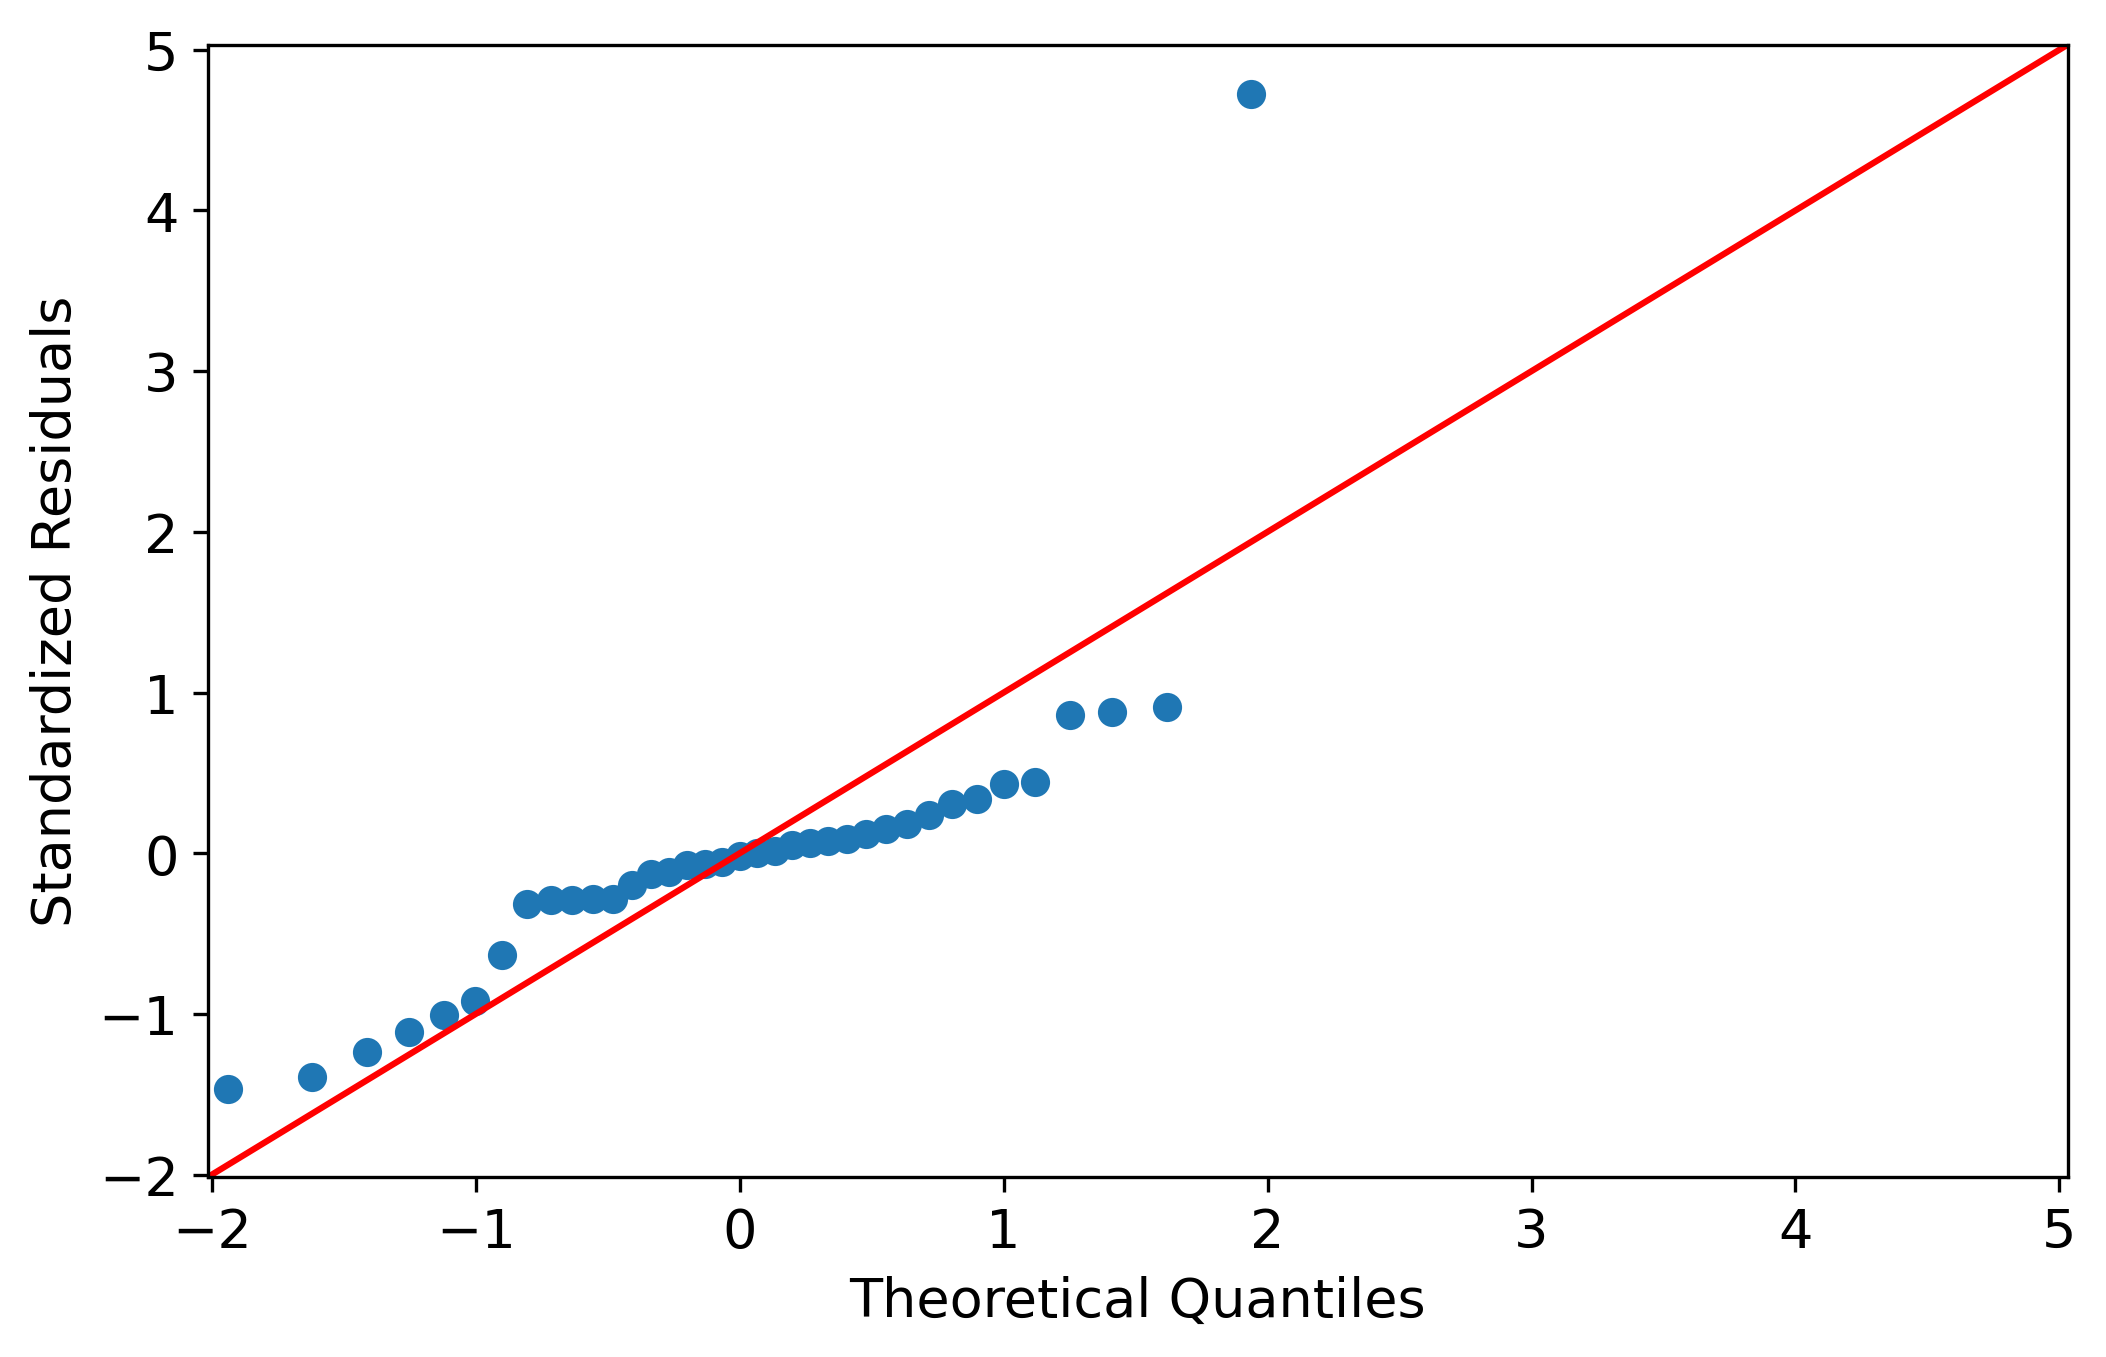

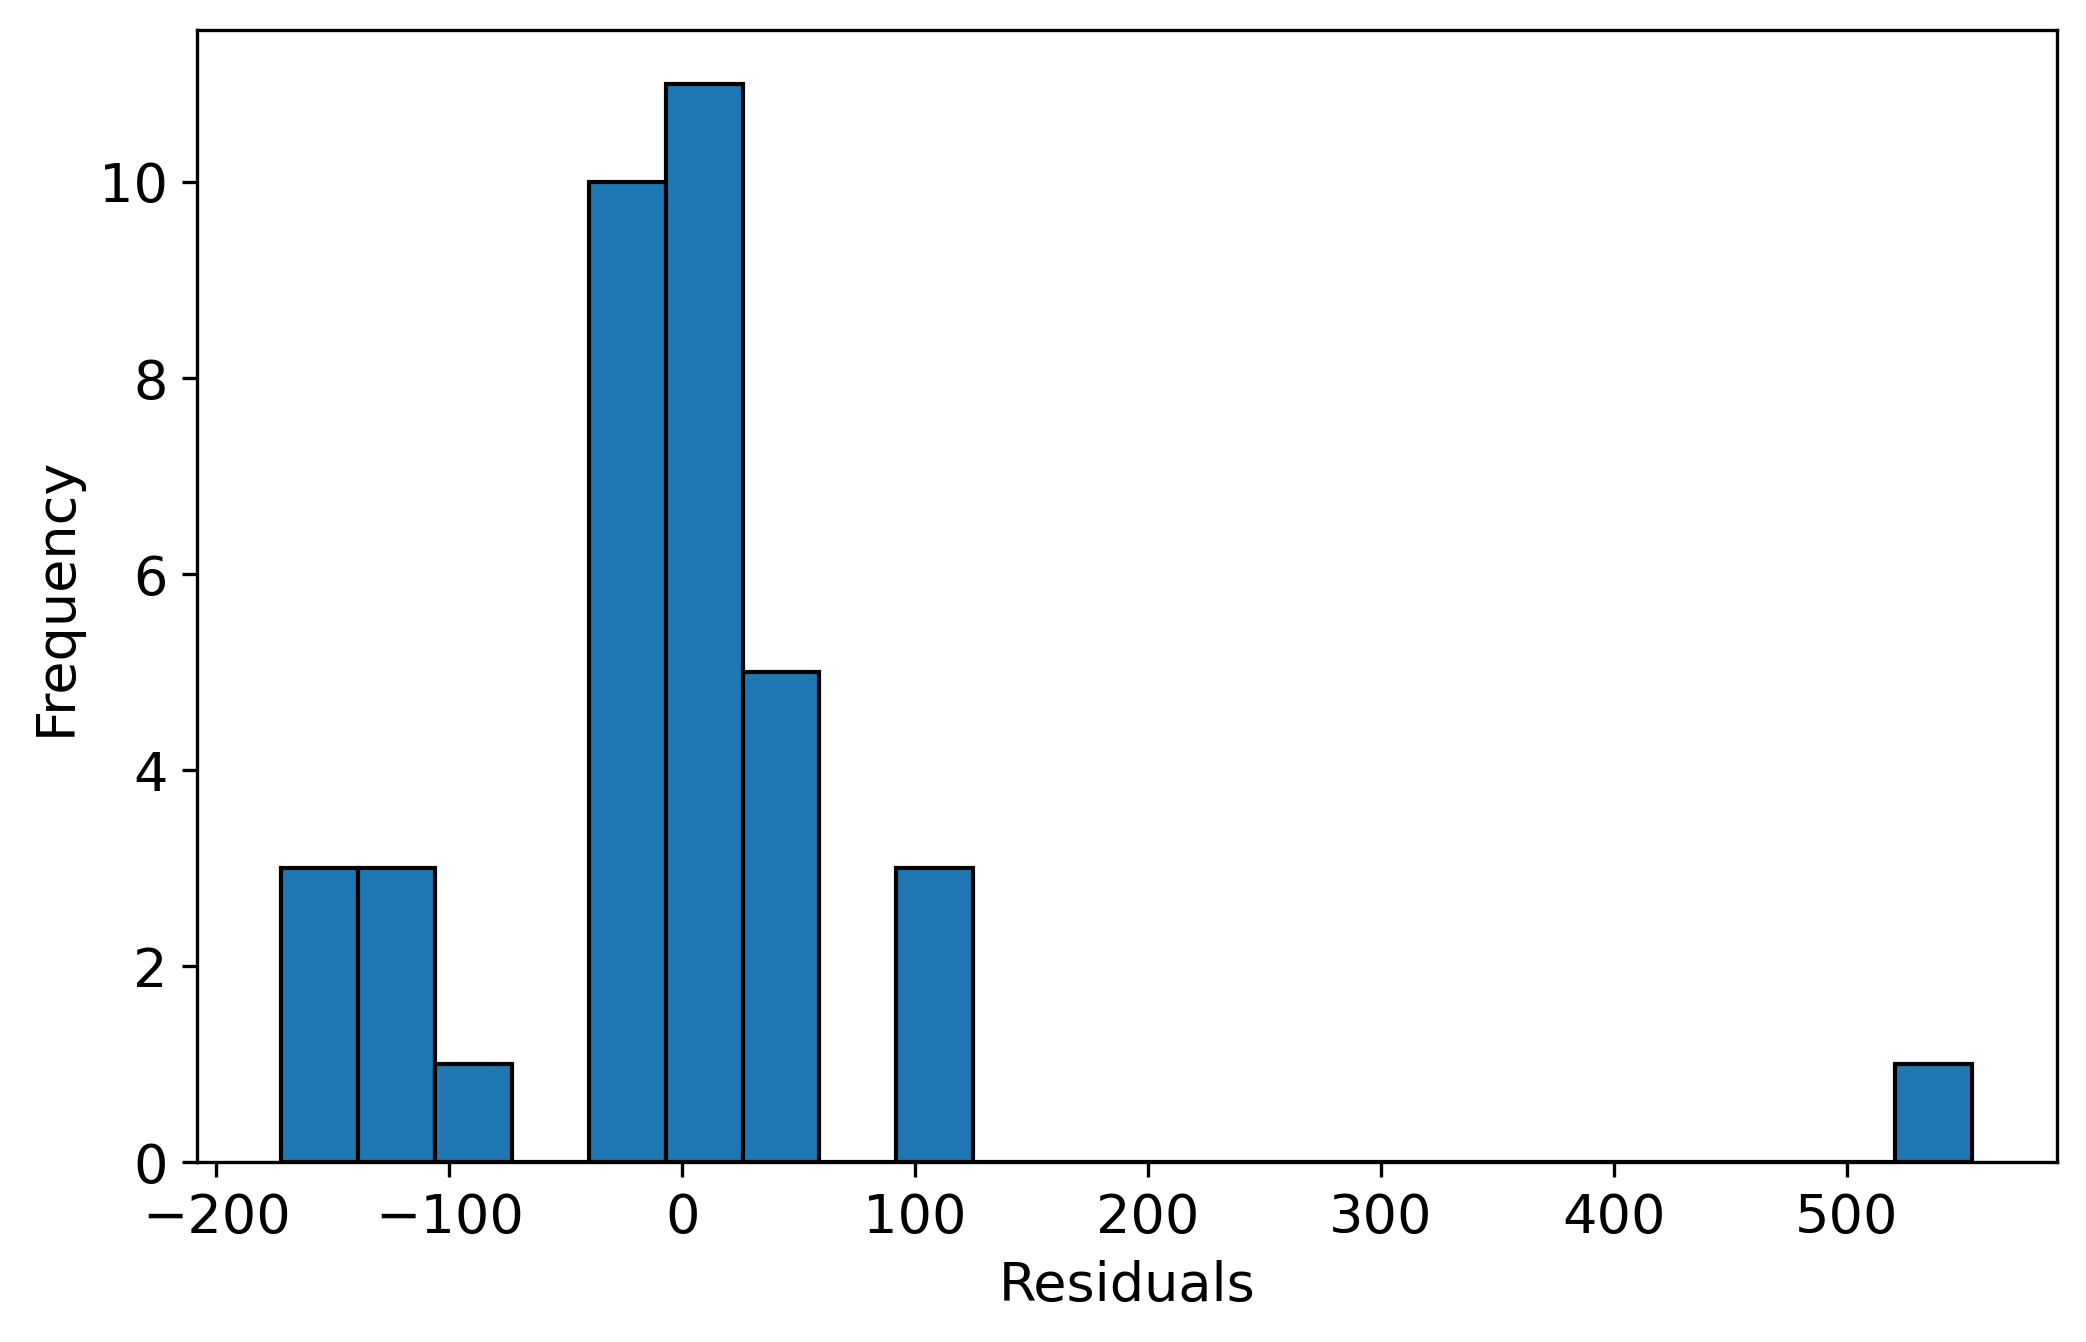

In [15]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig(fpga1 + '/Quantiles-LUT+DFFvsArea.png')
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.savefig(fpga1 + '/Frequency-LUT+DFFvsArea.png')
plt.show()

In [16]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

import scipy.stats as stats
w, pvalue = stats.bartlett(df1['LUT+DFF'], df1['Area'])
print(w, pvalue)

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='Value', xfac_var='Metrics')
res.bartlett_summary

df1 = df1.rename(columns={'LUT+DFF': 'LUTDFF'})

0.708975076675415 3.003164579240547e-07
49.478601553193464 2.005472964106721e-12


## TotalPower vs Power Arty

In [17]:
import scipy.stats as stats
df2 = df2.rename(columns={'TotalPower': 'FPGA Power', 'Power': 'ASIC Power'})


df_melt = pd.melt(df2.reset_index(), id_vars=['index'], value_vars=['FPGA Power','ASIC Power'])
# replace column names
df_melt.columns = ['index', 'Metrics', 'Value']
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df2['FPGA Power'], df2['ASIC Power'])
#print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Value ~ C(Metrics)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='Value', anova_model='Value ~ C(Metrics)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Metrics),1.0,1027.157777,1027.157777,1619.591205,6.688012e-31
Residual,35.0,22.197282,0.634208,NaN,NaN


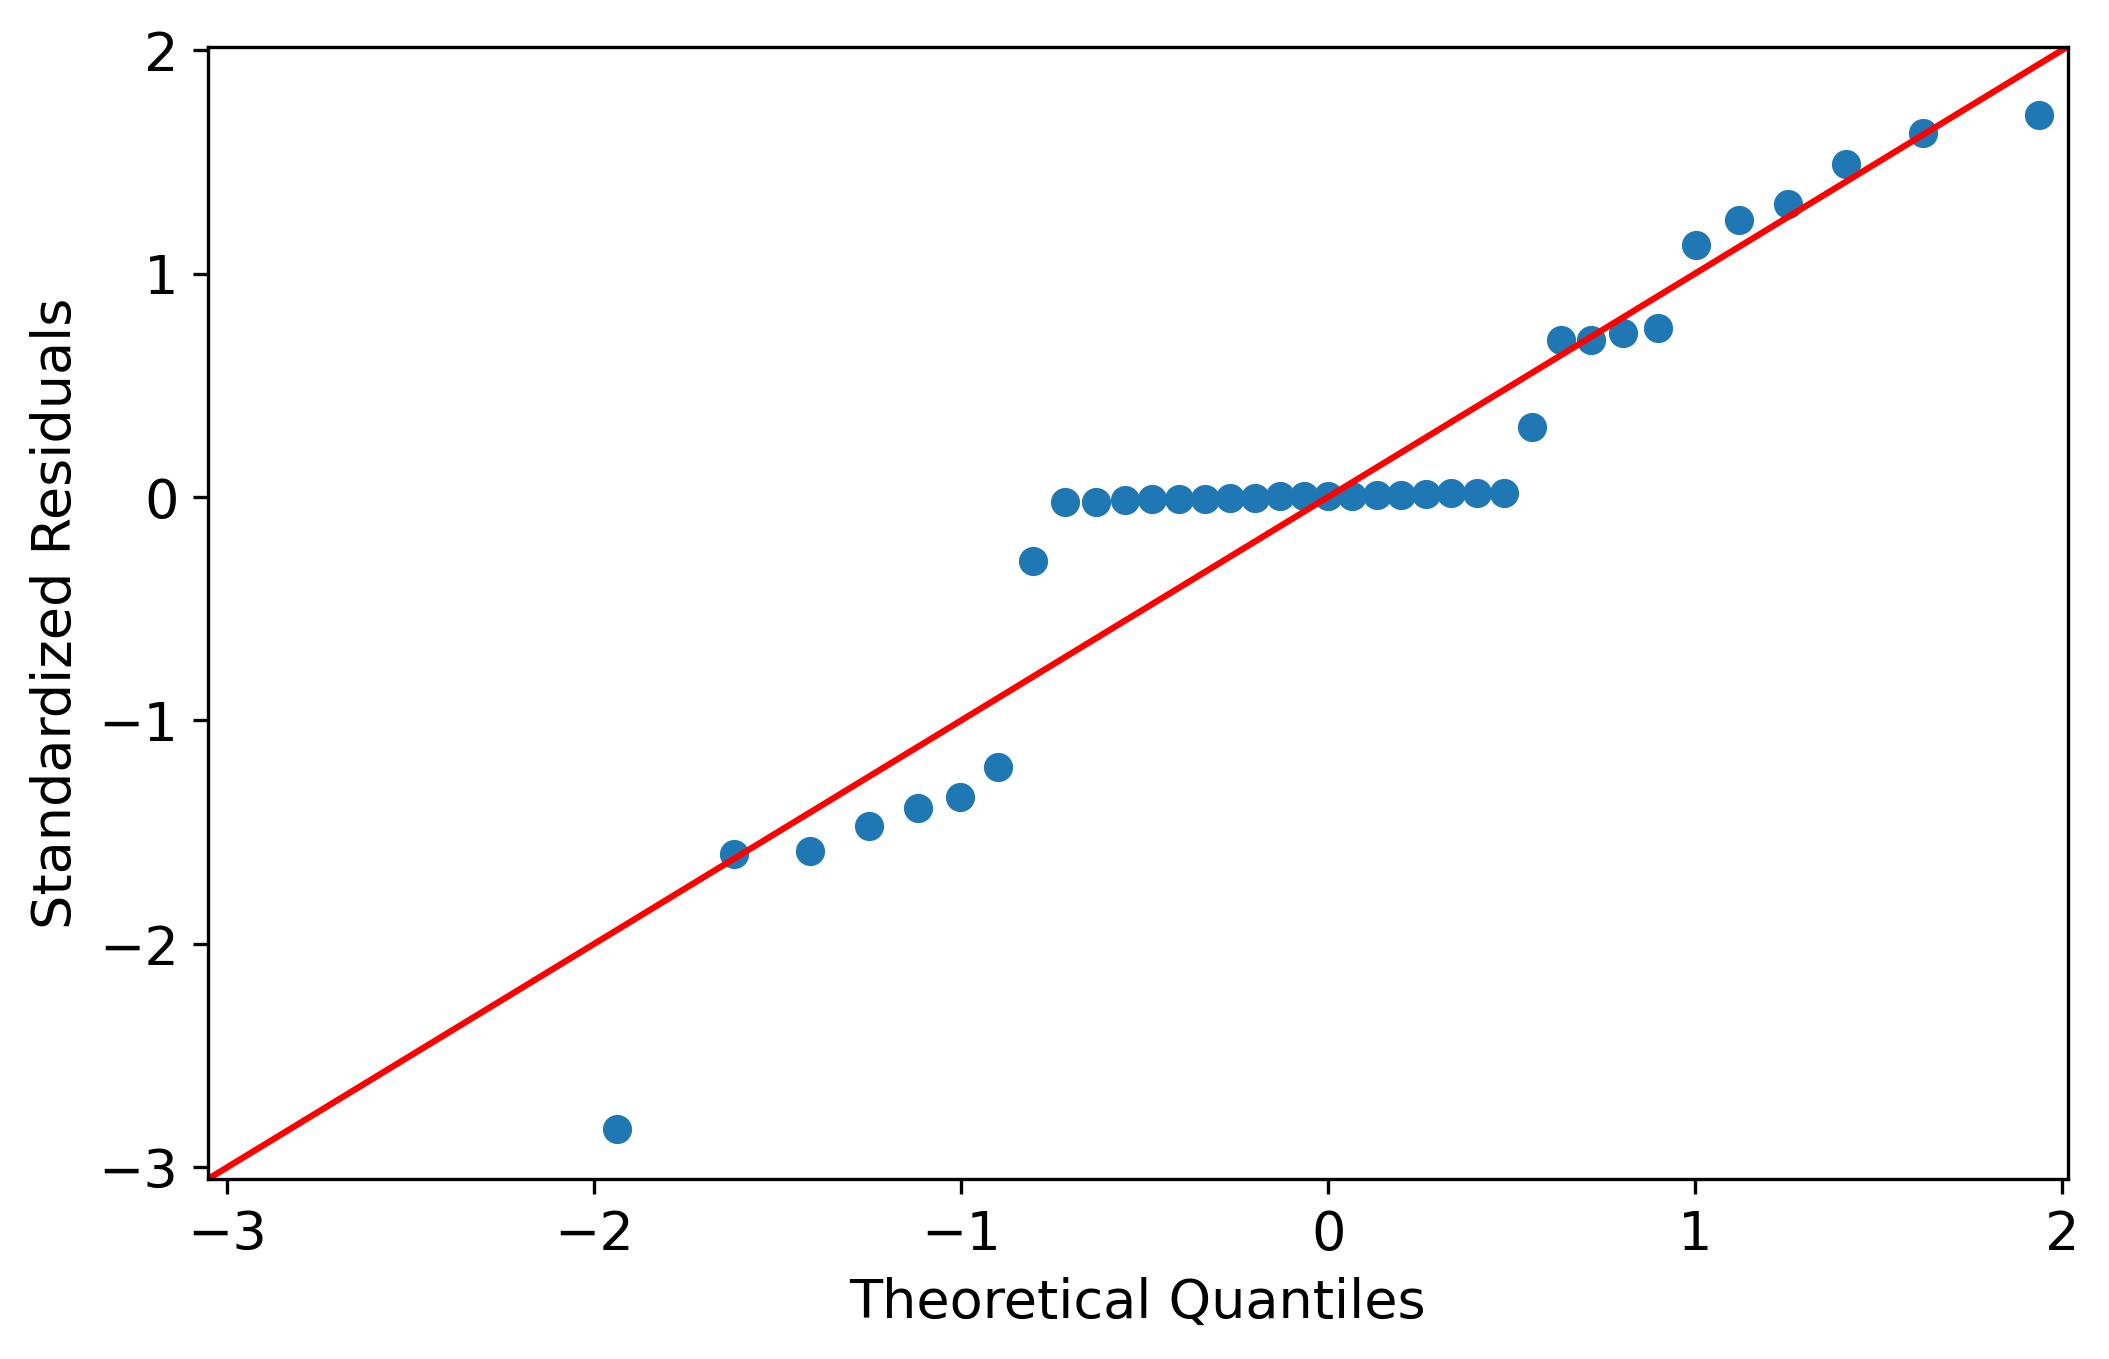

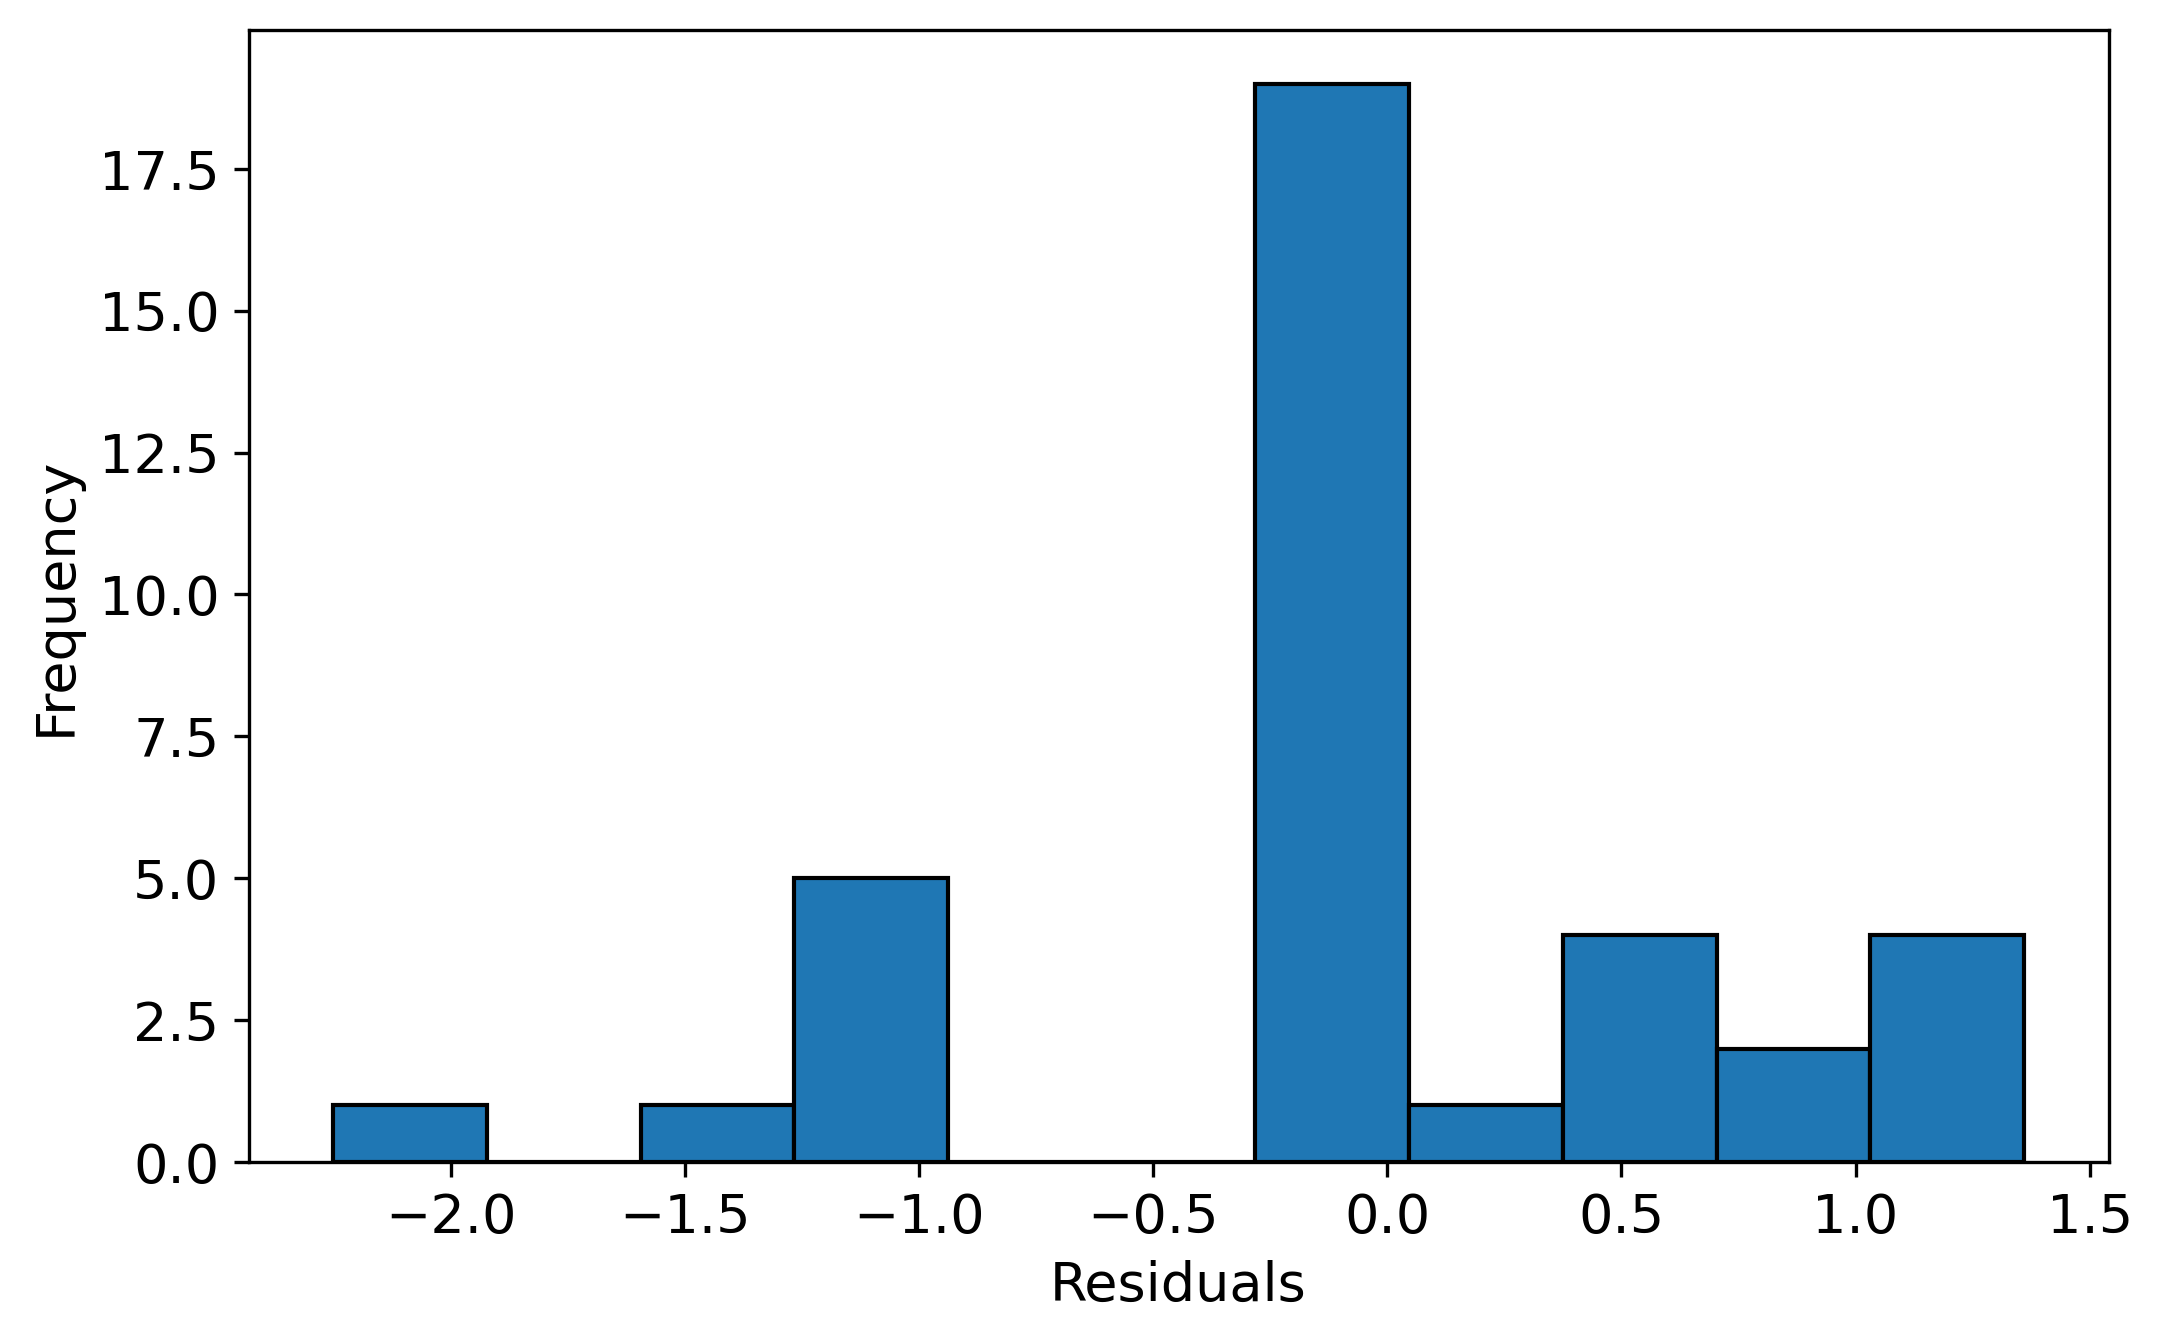

In [18]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig(fpga2 + '/Quantiles-TotalPowervsPower.png')
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.savefig(fpga2 + '/Frequency-TotalPowervsPower.png')
plt.show()

In [19]:
df2 = df2.rename(columns={'FPGA Power': 'TotalPower', 'ASIC Power': 'Power'})

## LUT+DFF vs Area Arty

In [20]:
import scipy.stats as stats
df2 = df2.rename(columns={'LUTDFF': 'LUT+DFF'})

df_melt = pd.melt(df2.reset_index(), id_vars=['index'], value_vars=['LUT+DFF','Area'])
# replace column names
df_melt.columns = ['index', 'Metrics', 'Value']
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df2['LUT+DFF'], df2['Area'])
#print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Value ~ C(Metrics)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='Value', anova_model='Value ~ C(Metrics)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Metrics),1.0,1.382633e+07,1.382633e+07,3647.985906,5.513851e-37
Residual,35.0,1.326544e+05,3.790126e+03,NaN,NaN


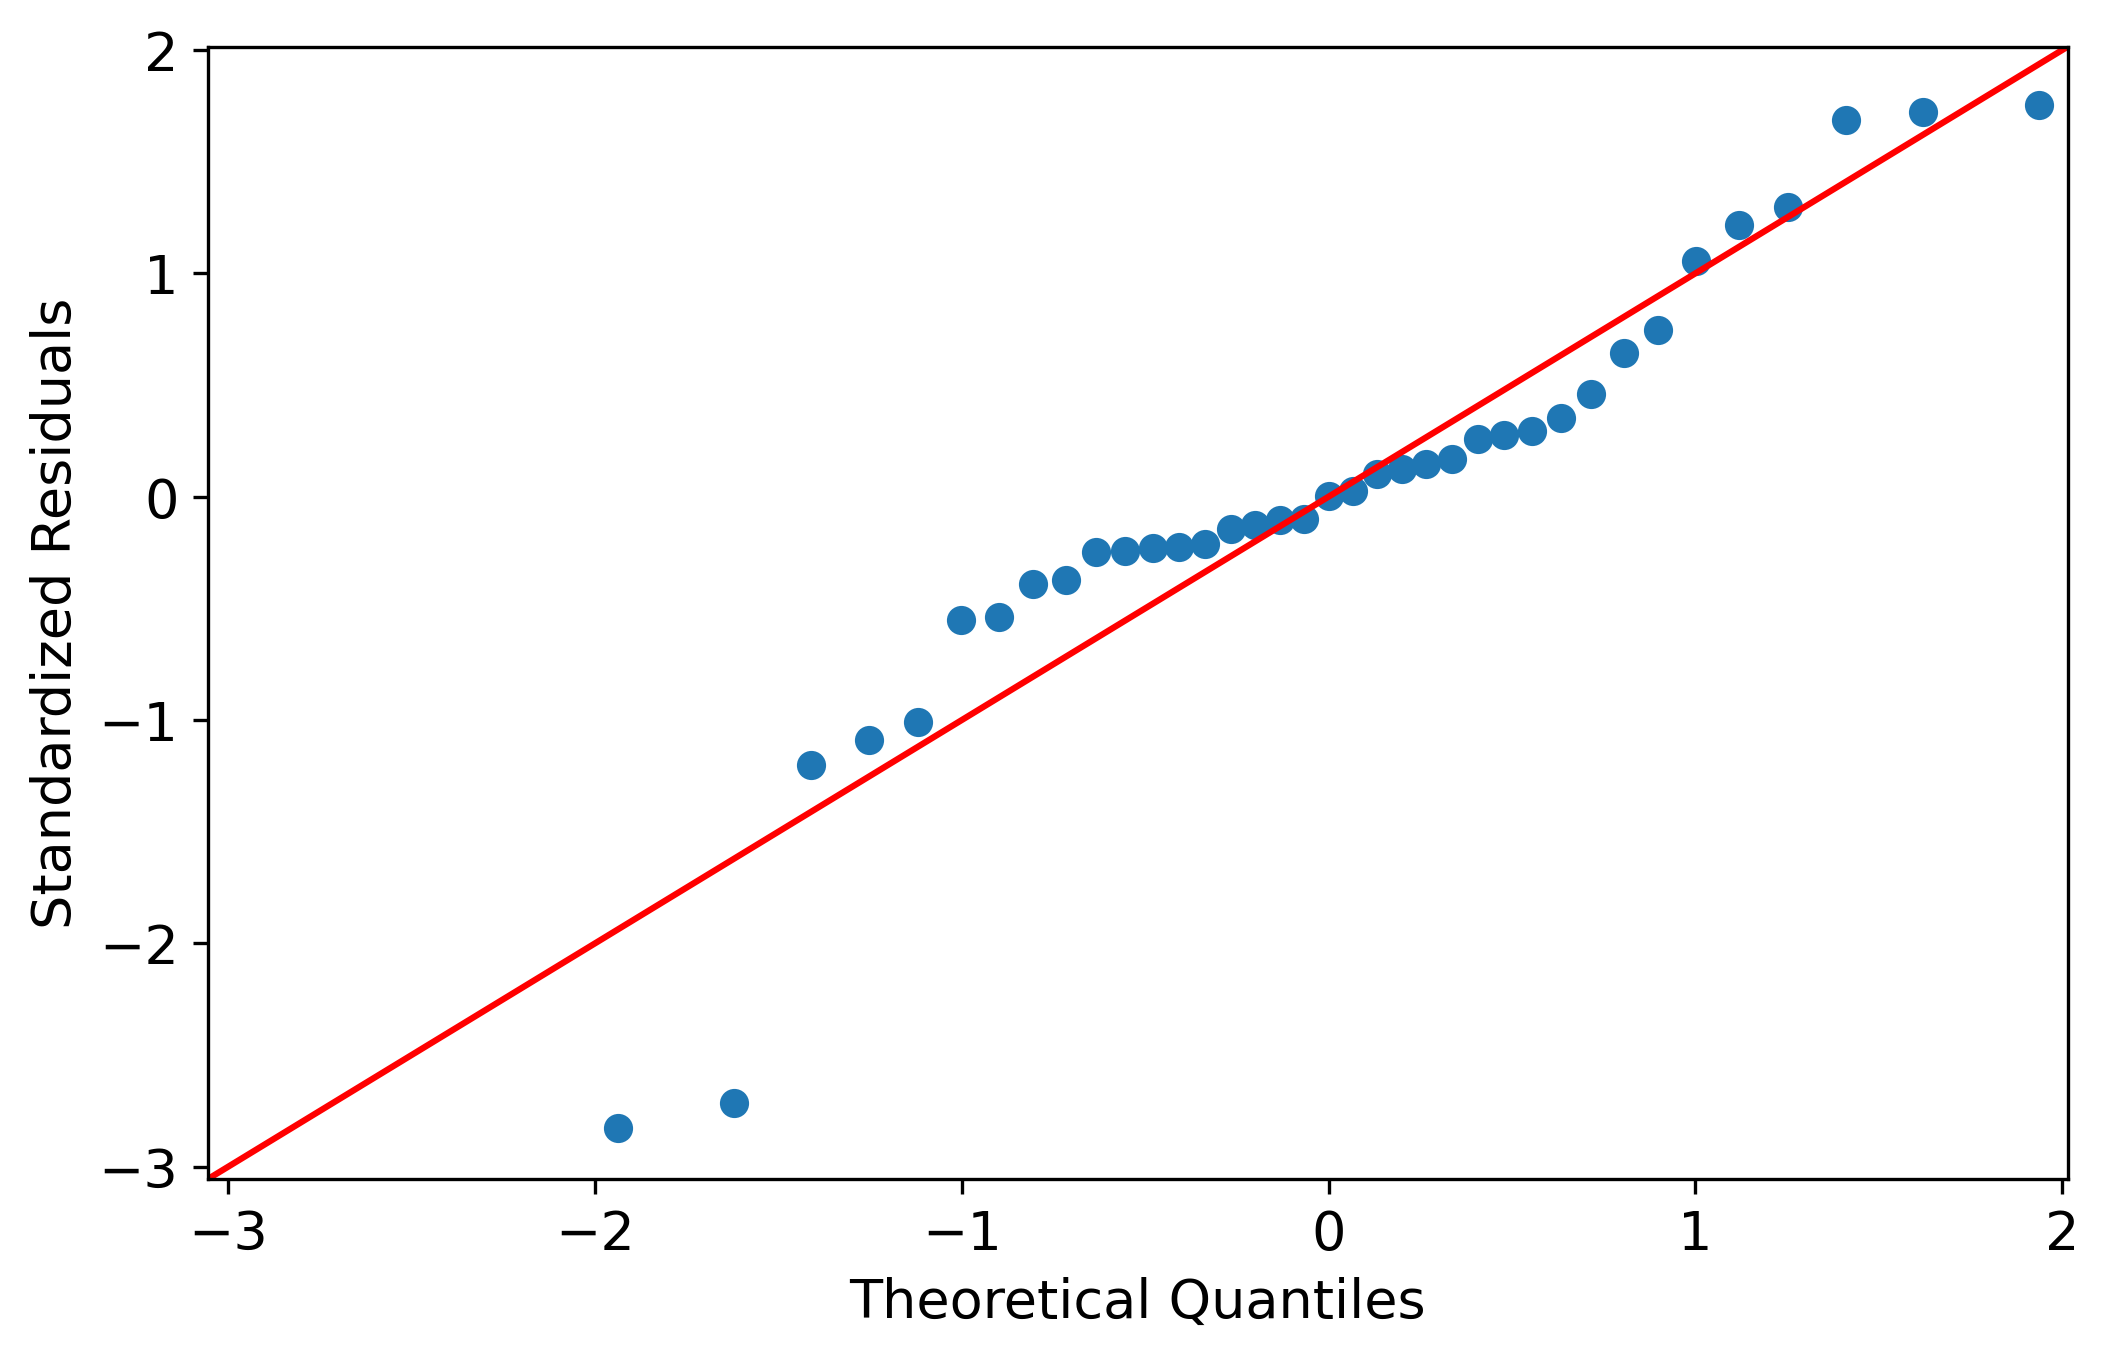

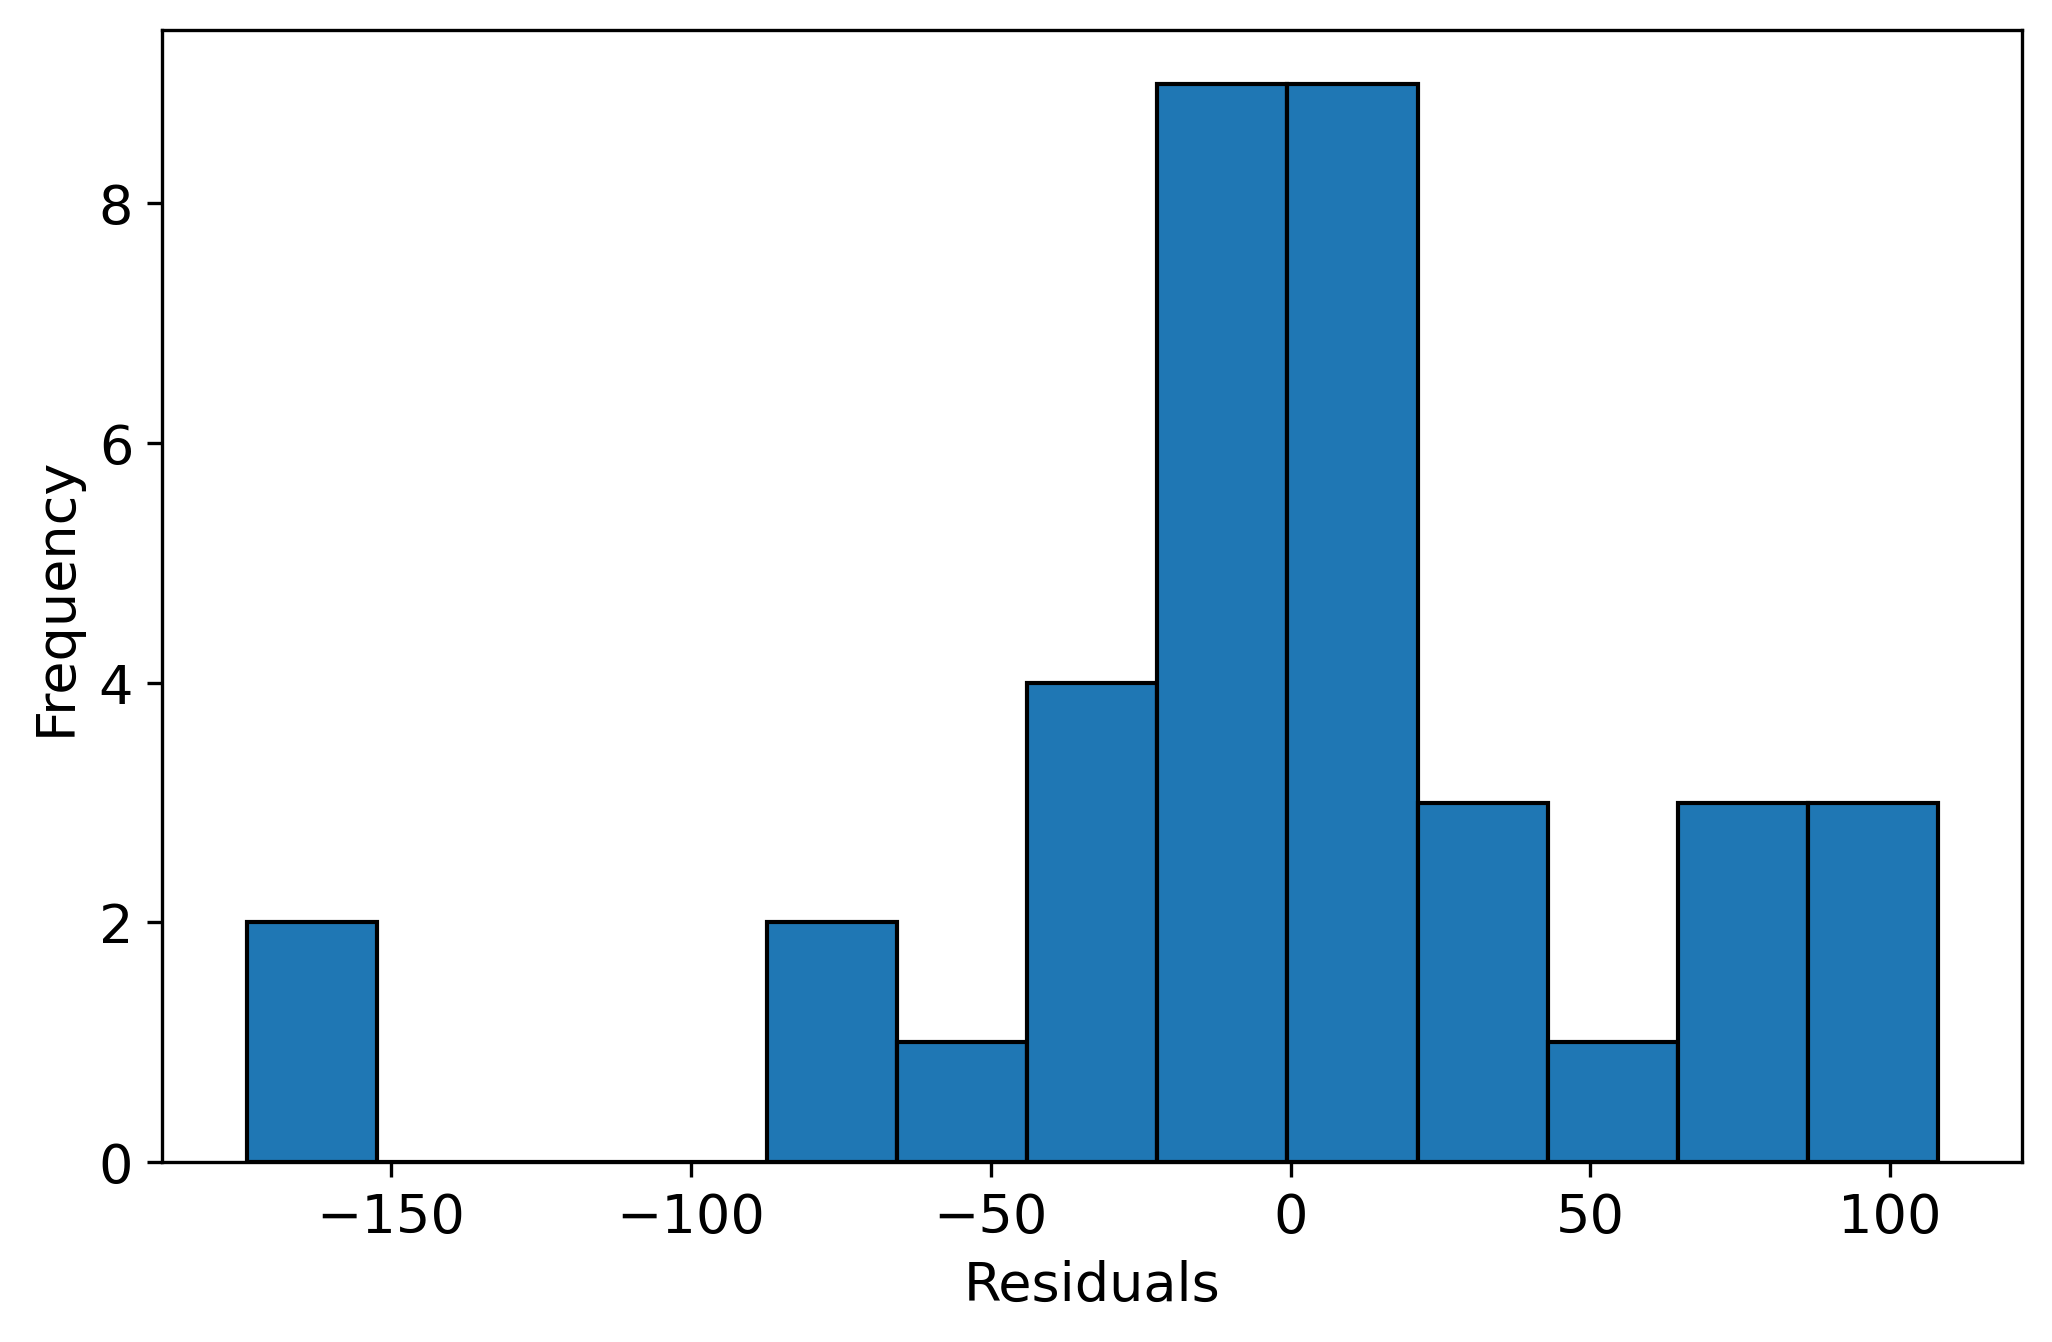

In [21]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig(fpga2 + '/Quantiles-LUT+DFFvsArea.png')
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.savefig(fpga2 + '/Frequency-LUT+DFFvsArea.png')
plt.show()

In [22]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

import scipy.stats as stats
w, pvalue = stats.bartlett(df2['LUT+DFF'], df2['Area'])
print(w, pvalue)

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='Value', xfac_var='Metrics')
res.bartlett_summary

df2 = df2.rename(columns={'LUT+DFF': 'LUTDFF'})

0.9111064672470093 0.006088512483984232
27.652624473313747 1.4517496642457067e-07


## SmartHLS vs Xilinx

In [23]:
df1 = df1.rename(columns={'TotalPower': 'PolarFire Power', 'LUTDFF': 'PolarFire LUT+DFF'})
df2 = df2.rename(columns={'TotalPower': 'Arty Power', 'LUTDFF': 'Arty LUT+DFF'})
df3 = pd.merge(df1,df2,on='Adder', how='inner')

### LUT

In [24]:
import scipy.stats as stats

df_melt = pd.melt(df3.reset_index(), id_vars=['index'], value_vars=['PolarFire LUT+DFF','Arty LUT+DFF'])
# replace column names
df_melt.columns = ['index', 'Metrics', 'Value']
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df3['PolarFire LUT+DFF'], df3['Arty LUT+DFF'])
#print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Value ~ C(Metrics)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='Value', anova_model='Value ~ C(Metrics)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Metrics),1.0,1.873236e+06,1.873236e+06,112.294082,1.290563e-12
Residual,36.0,6.005347e+05,1.668152e+04,NaN,NaN


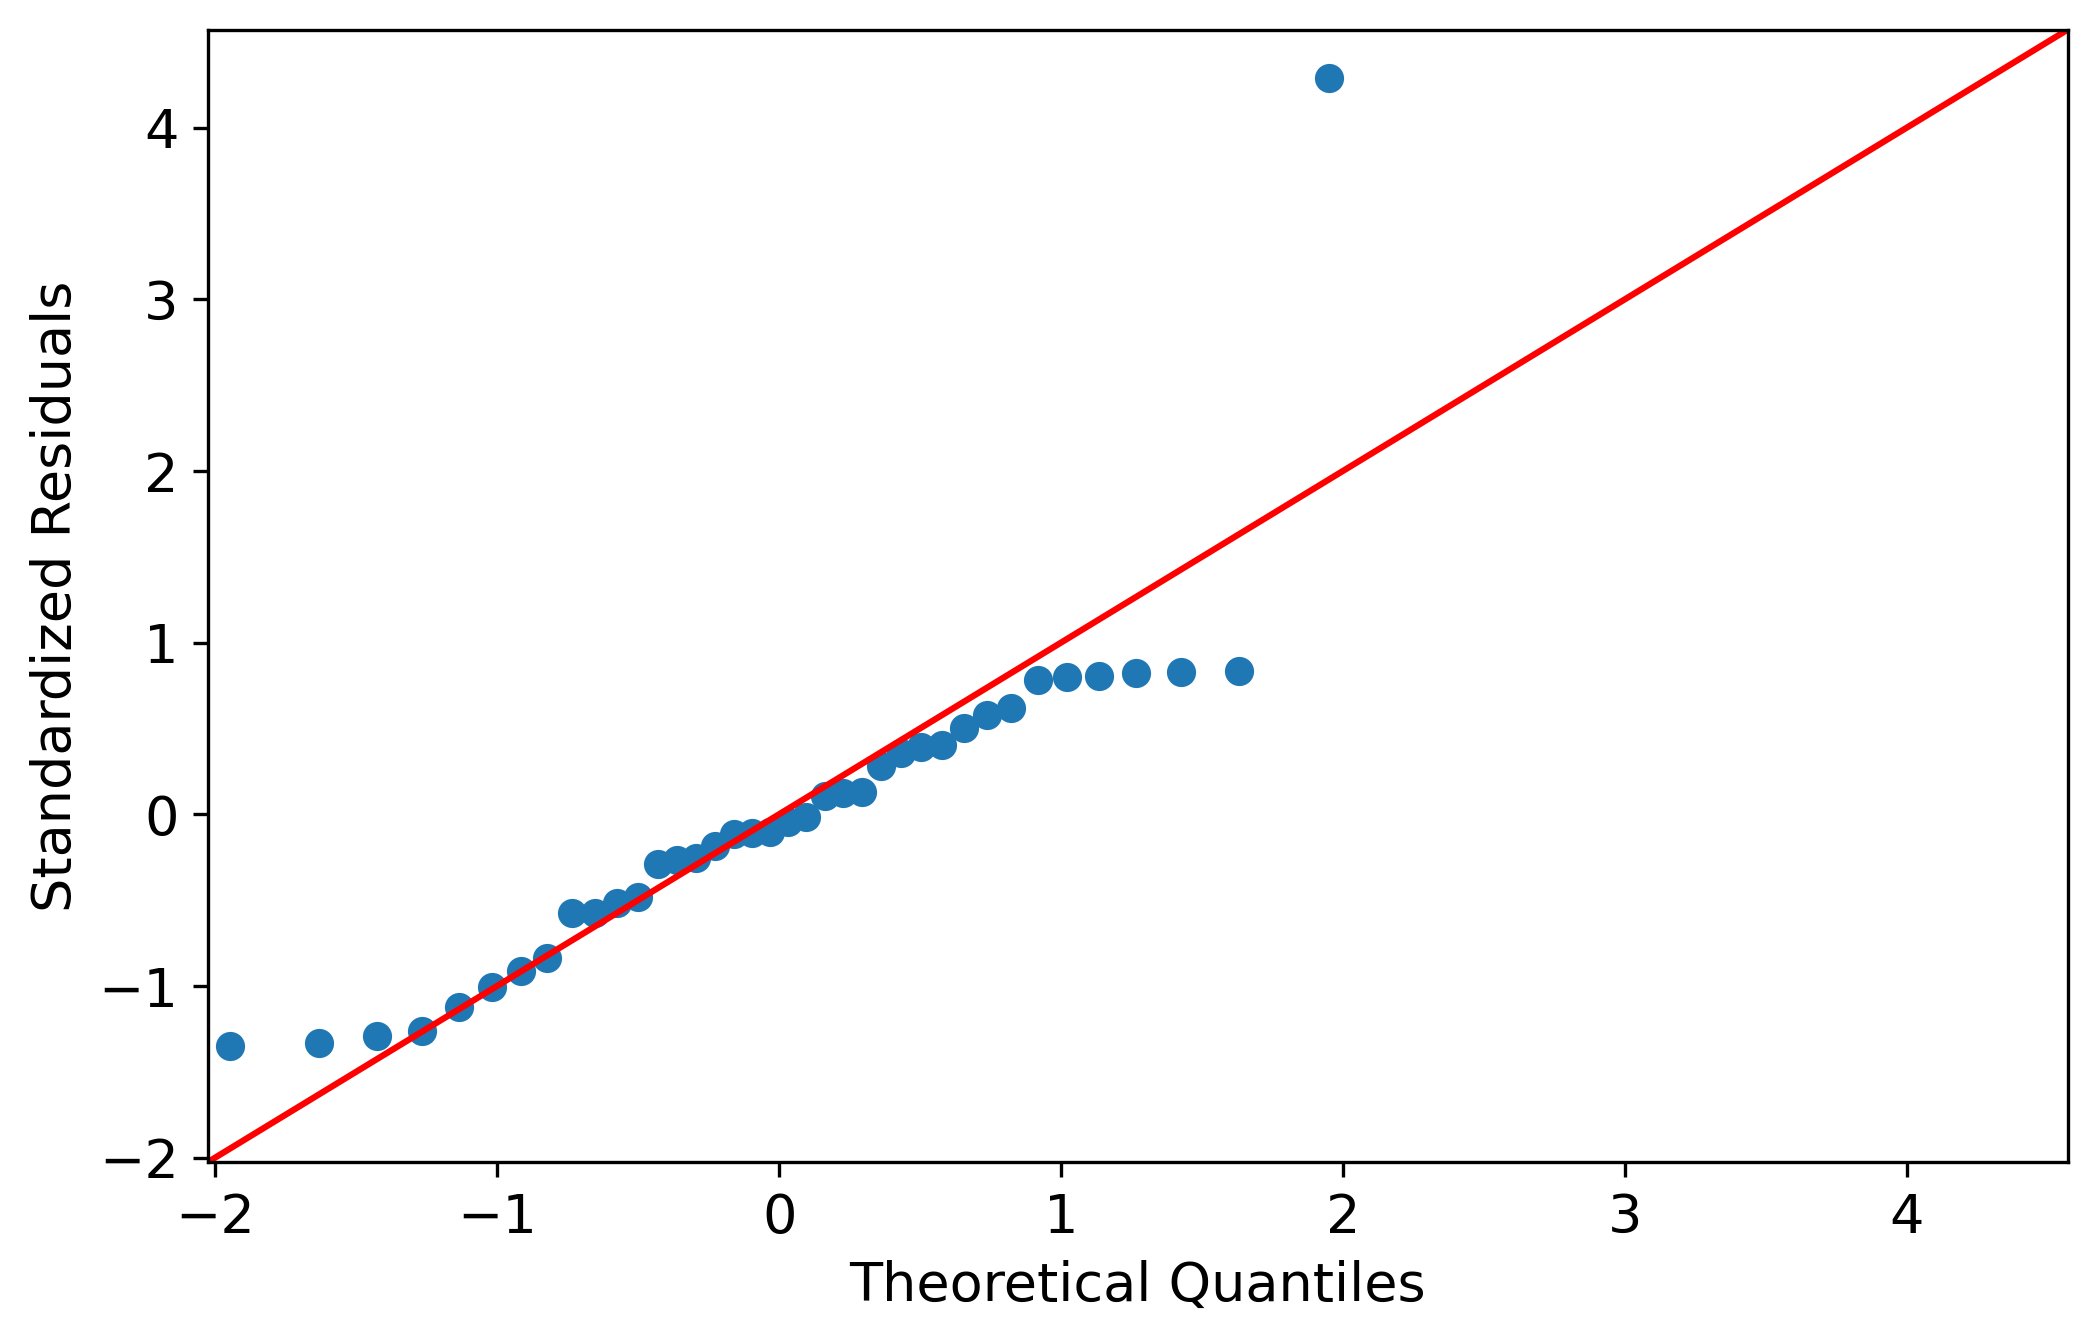

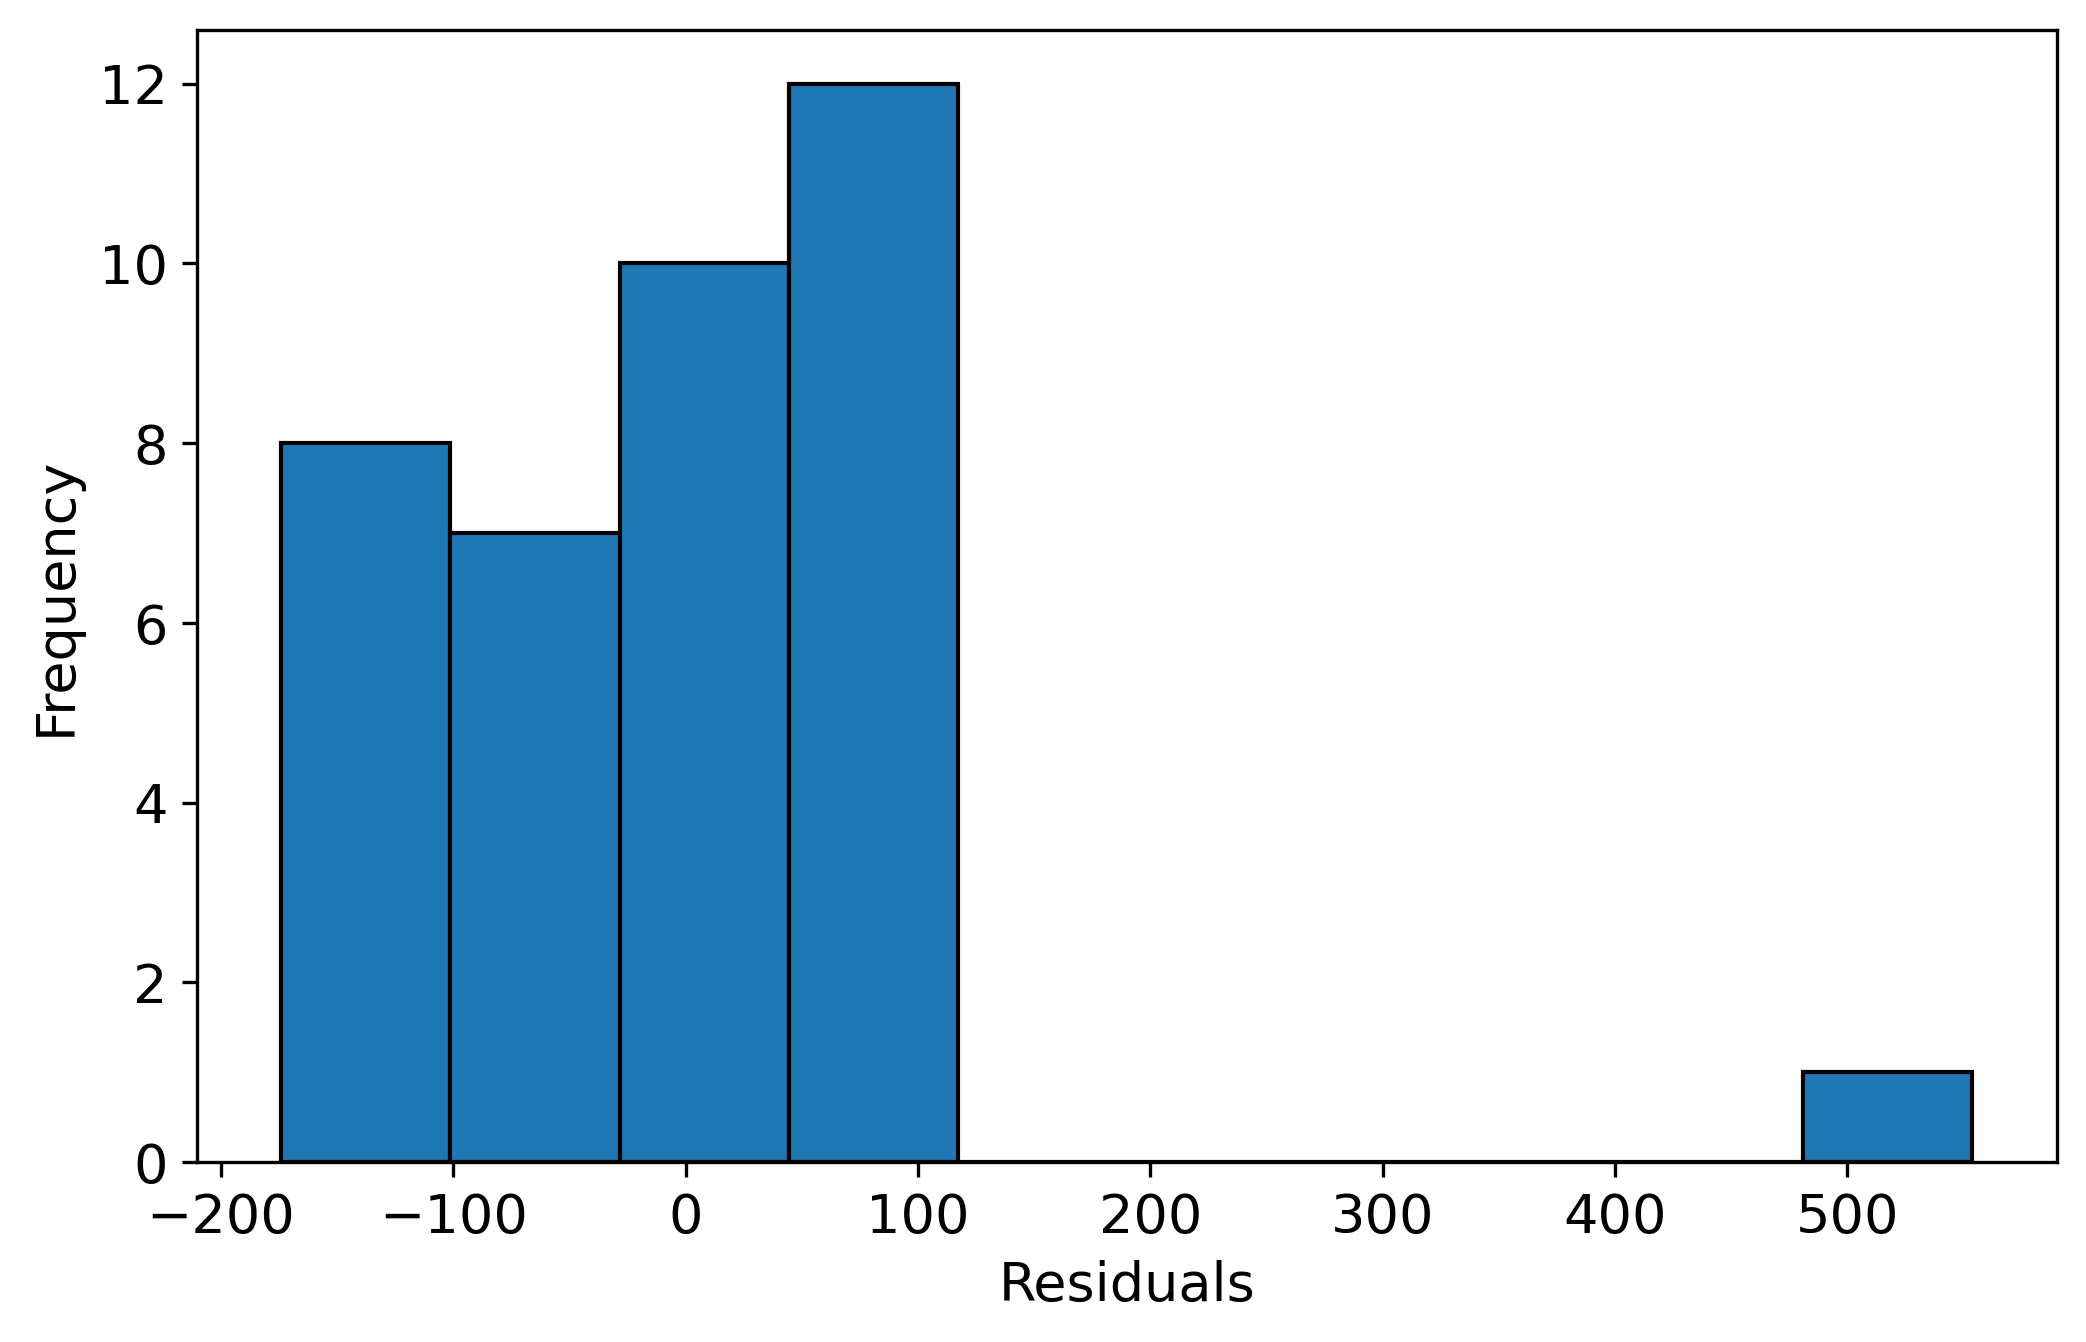

In [25]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('Quantiles-LUTSmartvsXilinx.png')
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.savefig('Frequency-LUTSmartvsXilinx.png')
plt.show()

In [26]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

import scipy.stats as stats
w, pvalue = stats.bartlett(df3['PolarFire LUT+DFF'], df3['Arty LUT+DFF'])
print(w, pvalue)

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='Value', xfac_var='Metrics')
res.bartlett_summary

0.818544864654541 2.5519399059703574e-05
7.213463280830196 0.0072358738388544385


,Parameter,Value
0,Test statistics (T),7.2135
1,Degrees of freedom (Df),1.0000
2,p value,0.0072


### Power

In [27]:
import scipy.stats as stats

df_melt = pd.melt(df3.reset_index(), id_vars=['index'], value_vars=['PolarFire Power','Arty Power'])
# replace column names
df_melt.columns = ['index', 'Metrics', 'Value']
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df3['PolarFire Power'], df3['Arty Power'])
#print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Value ~ C(Metrics)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='Value', anova_model='Value ~ C(Metrics)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Metrics),1.0,31450.213266,31450.213266,45353.819597,2.037649e-57
Residual,36.0,24.963888,0.693441,NaN,NaN


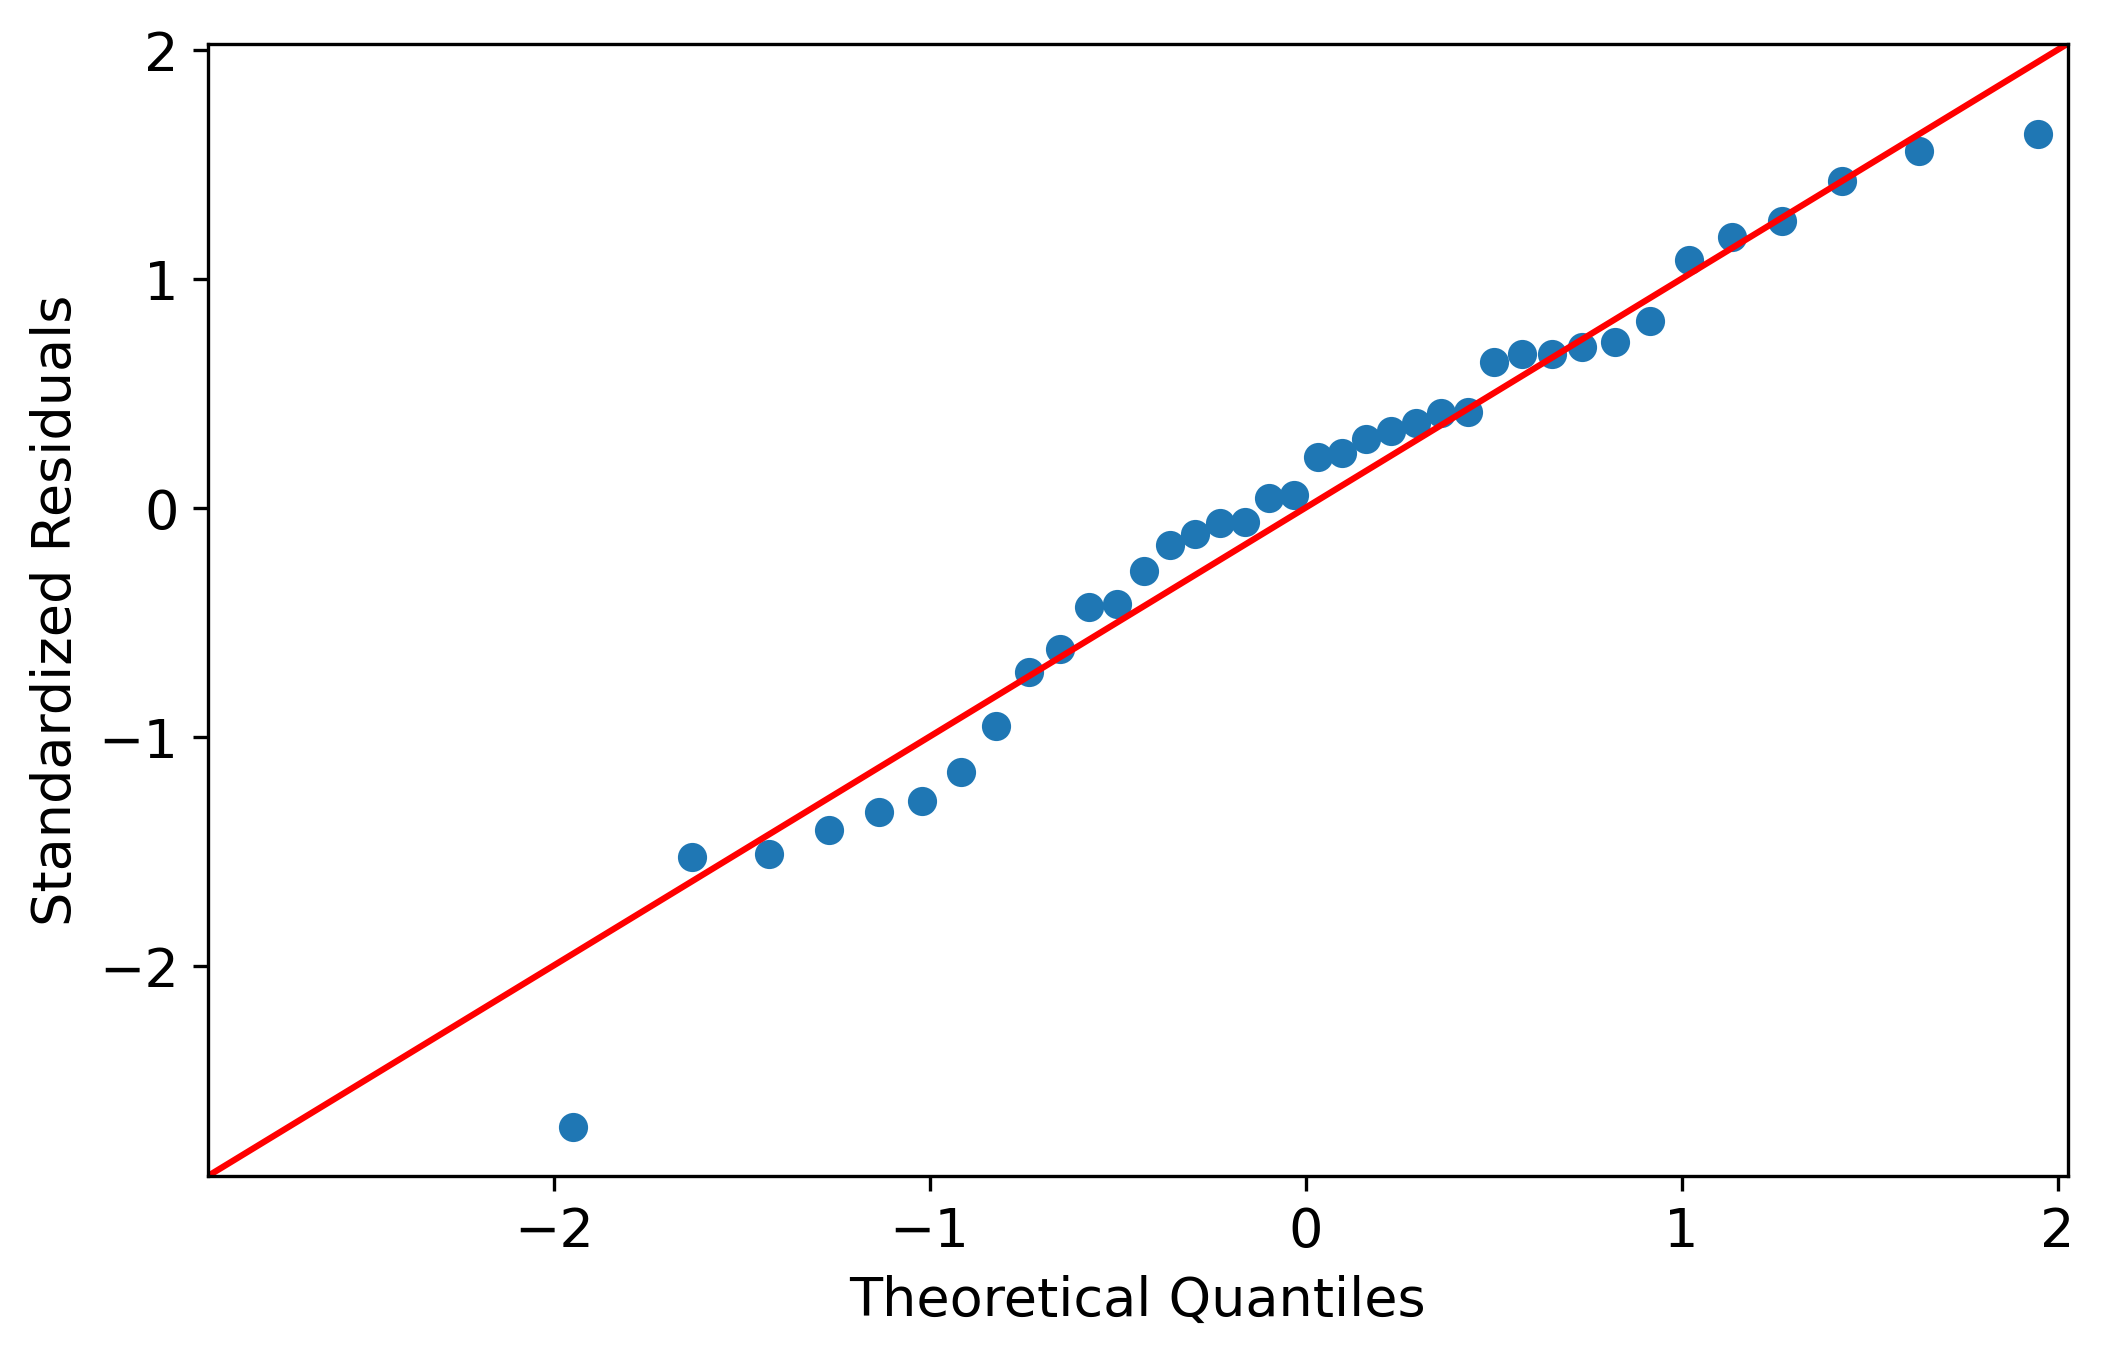

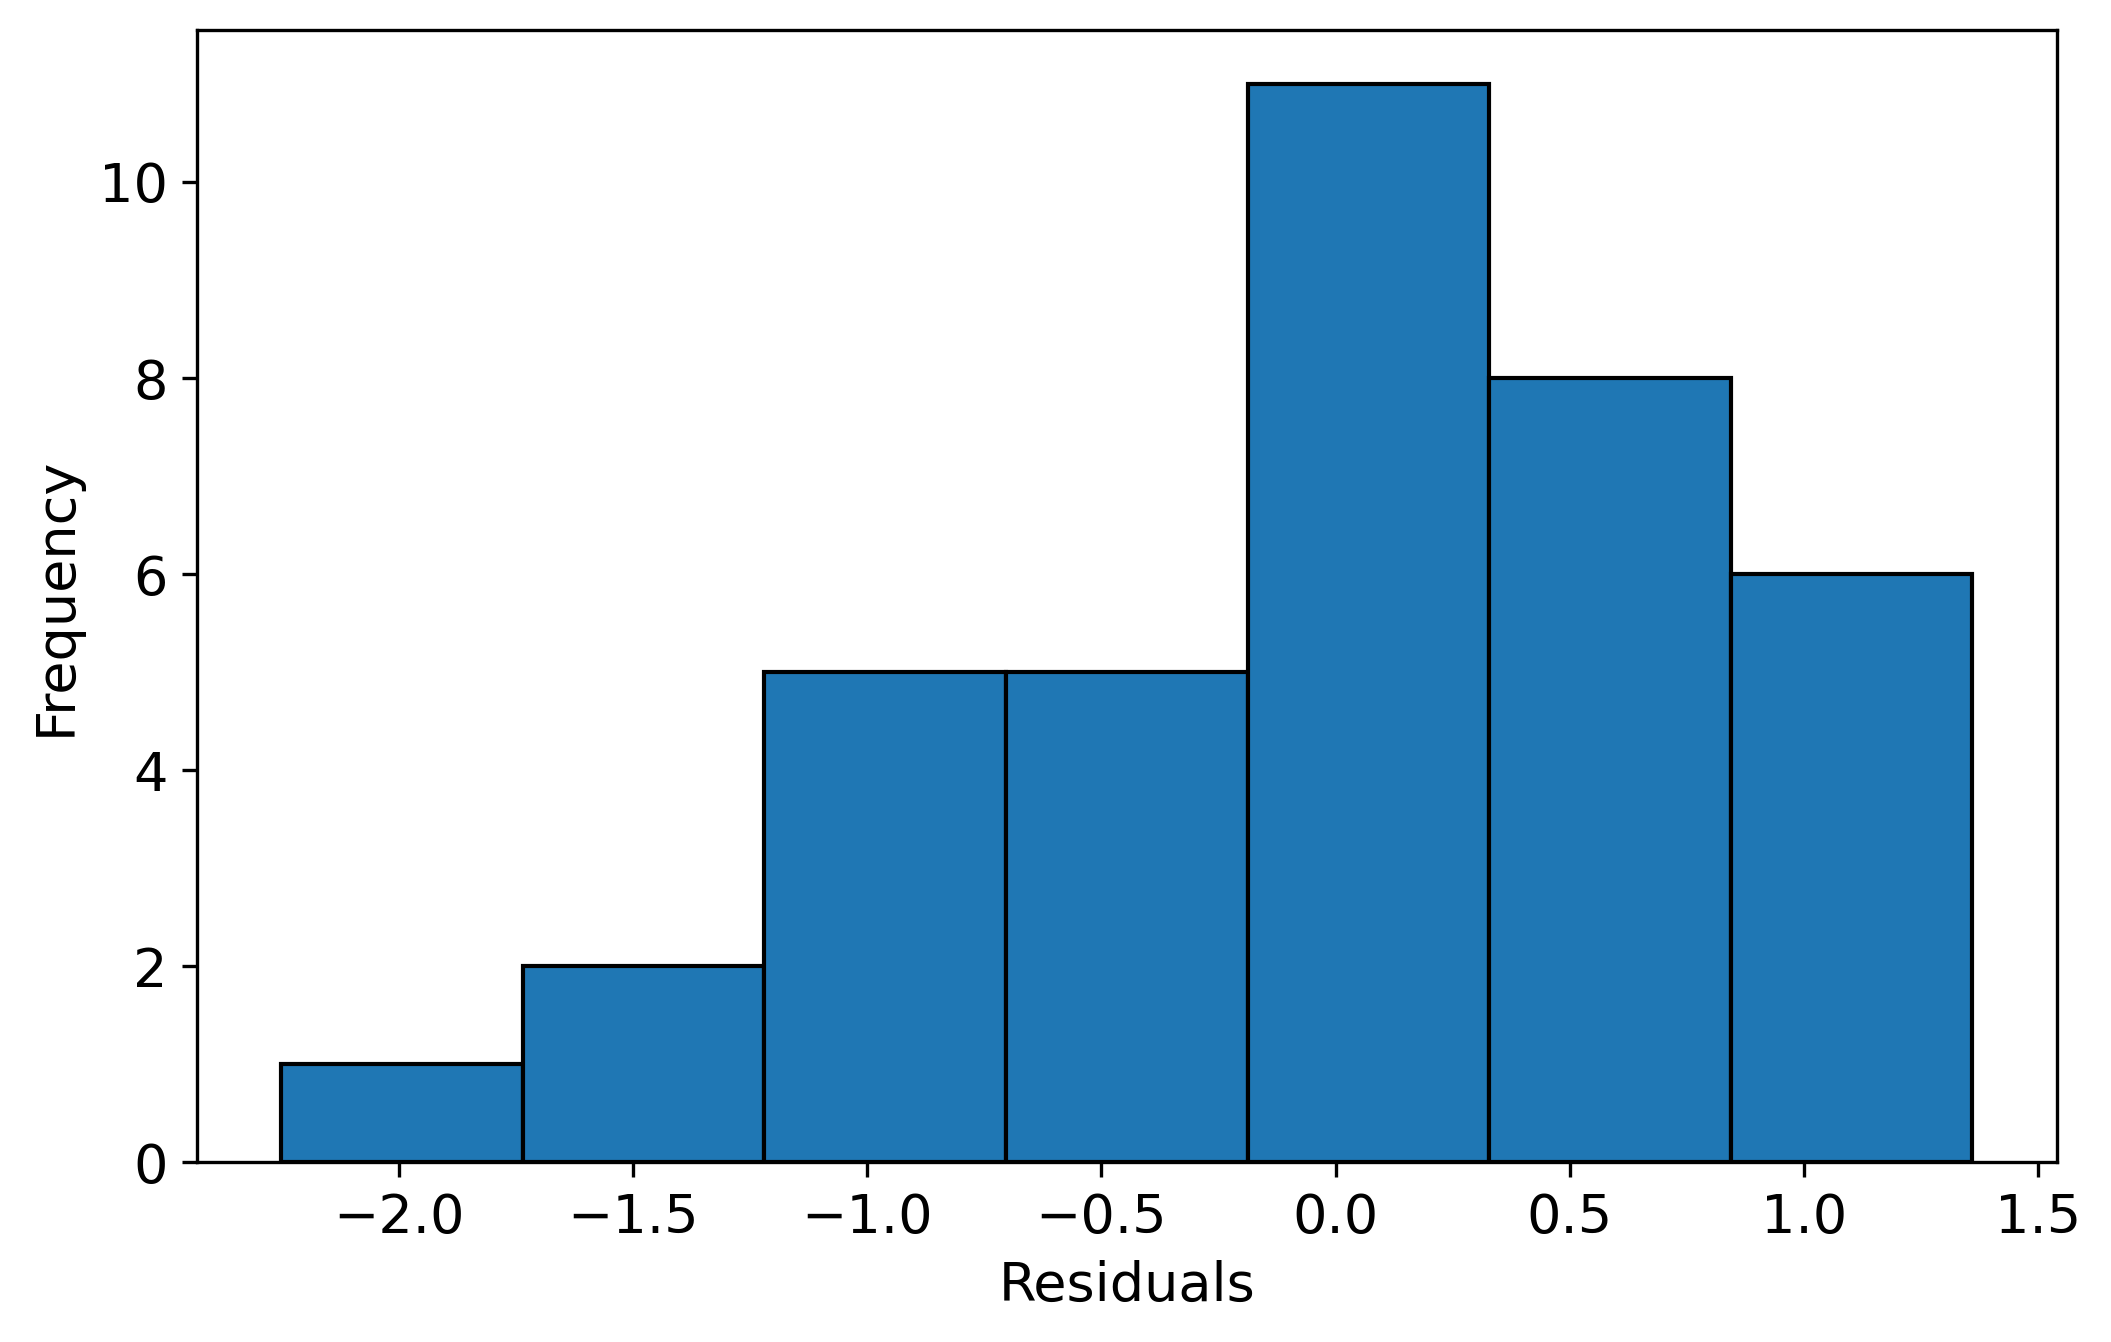

In [28]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('Quantiles-PowerSmartvsXilinx.png')
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.savefig('Frequency-PowerSmartvsXilinx.png')
plt.show()

In [29]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

import scipy.stats as stats
w, pvalue = stats.bartlett(df3['PolarFire Power'], df3['Arty Power'])
print(w, pvalue)

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='Value', xfac_var='Metrics')
res.bartlett_summary

0.9669590592384338 0.31649744510650635
16.295369670892274 5.419622162799391e-05


,Parameter,Value
0,Test statistics (T),16.2954
1,Degrees of freedom (Df),1.0000
2,p value,0.0001


In [30]:
df1 = df1.rename(columns={'PolarFire Power': 'TotalPower', 'PolarFire LUT+DFF': 'LUTDFF'})
df2 = df2.rename(columns={'Arty Power': 'TotalPower', 'Arty LUT+DFF': 'LUTDFF'})

# General Plots

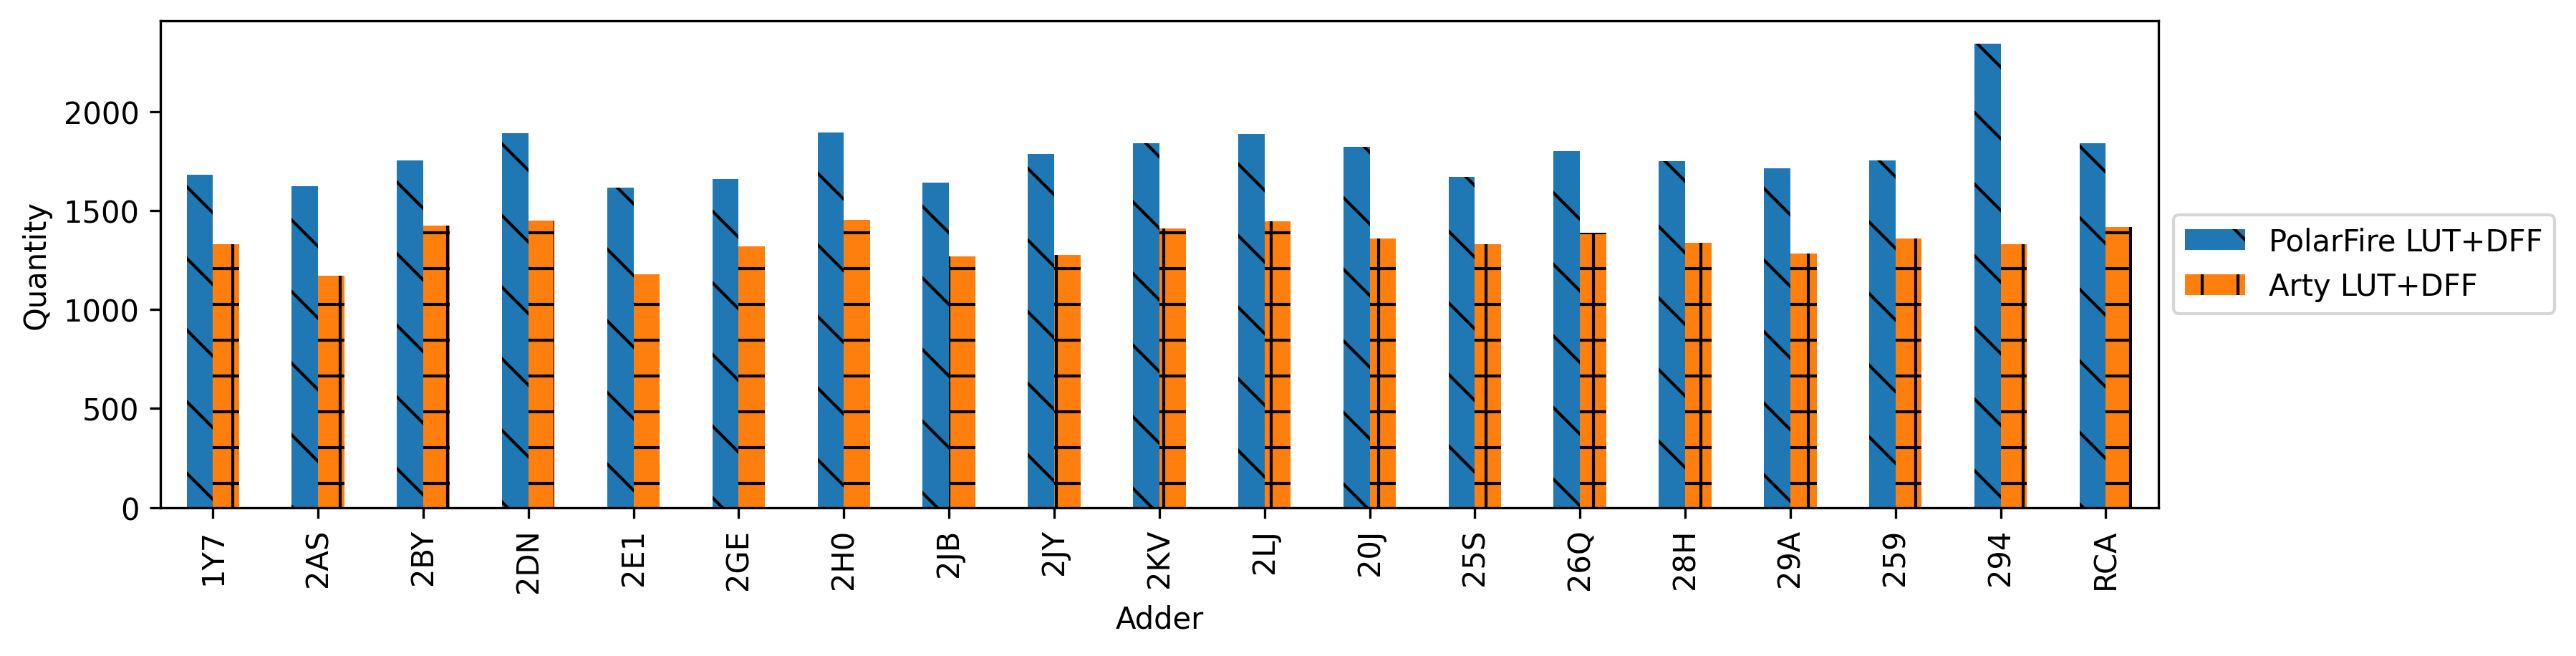

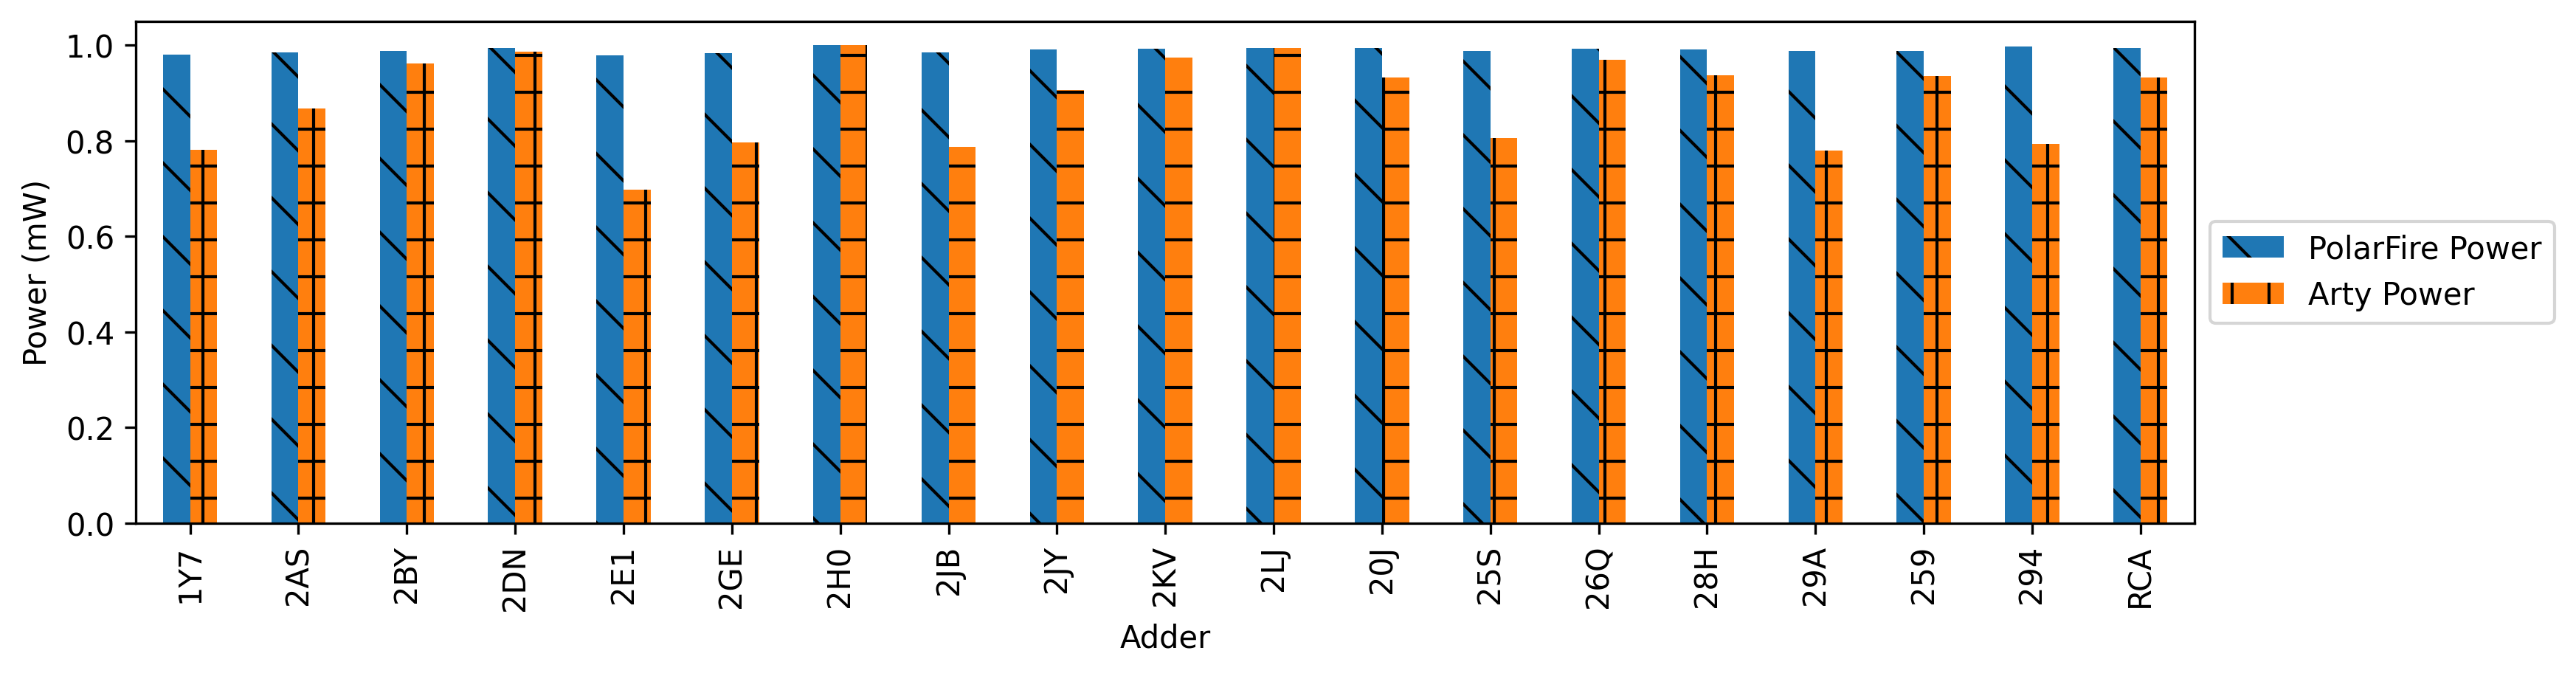

In [31]:
rcParams['figure.figsize'] = 12, 3
rcParams['font.size'] = 10

df1 = df1.rename(columns={'NormTPower': 'PolarFire Power', 'LUTDFF': 'PolarFire LUT+DFF'})
df2 = df2.rename(columns={'NormTPower': 'Arty Power', 'LUTDFF': 'Arty LUT+DFF'})

df3 = pd.merge(df1,df2,on='Adder', how='inner')
ax = plt.figure().add_subplot(111)
df3.plot(ax=ax, y=["PolarFire LUT+DFF", "Arty LUT+DFF"], x="Adder", kind="bar")

bars = ax.patches
hatches = ''.join(h*len(df3) for h in '\\+')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Quantity')
plt.savefig('LUTMicrochipvsXilinx.png', bbox_inches = 'tight')
plt.show()

ax = plt.figure().add_subplot(111)
df3.plot(ax=ax, y=["PolarFire Power", "Arty Power"], x="Adder", kind="bar")

bars = ax.patches
hatches = ''.join(h*len(df3) for h in '\\+')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Power (mW)')
plt.savefig('PowerMicrochipvsXilinx.png', bbox_inches = 'tight')
plt.show()

df1 = df1.rename(columns={'PolarFire Power':'NormTPower', 'PolarFire LUT+DFF':'LUTDFF'})
df2 = df2.rename(columns={'Arty Power':'NormTPower', 'Arty LUT+DFF':'LUTDFF'})